In [3]:
import pandas as pd
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from tqdm import tqdm

In [4]:
path = './data/'

In [5]:
files = sorted(glob(path+'*.csv'))

In [6]:

dj_fcst = pd.read_csv(files[0])
dj_obs = pd.read_csv(files[1])
energy = pd.read_csv(files[2])
site = pd.read_csv(files[4])
us_fcst = pd.read_csv(files[5])
us_obs = pd.read_csv(files[6])
sample_submission = pd.read_csv(files[3])

# 기상예보데이터 전처리

## 전날에 예측한 것만 포함

In [7]:
def fcst(x):
    x['Forecast time'] = pd.to_datetime(x['Forecast time'], format = '%Y-%m-%d %H:%M:%S', errors='raise')
    x['fcst_time'] = x['Forecast time'] + pd.to_timedelta(x['forecast'], unit = 'h')
    
    x['diff'] = np.zeros(162208)
    x['month'] = np.zeros(162208)
    
    
    
    for i in range(len(x)):
        x['diff'][i] = x['fcst_time'][i].day - x['Forecast time'][i].day
        x['month'][i] = x['Forecast time'][i].month
    
    x_ = x[x['diff'] == 1] #전날 예측한 것
    
    day_31 = x[(x['month']==1) | (x['month']==3) |(x['month']==5)|(x['month']==7)|(x['month']==8)|(x['month']==10)|(x['month']==12)]
    day_28 = x[(x['month']==2)]
    day_30 = x[(x['month']==4) | (x['month']==6) | (x['month']==9) | (x['month']==11)]
    
    # 달이 바뀌는 경우를 고려 ex) 3.31 -> 4.1
    fcst_31 = day_31[day_31['diff'] == -30]
    fcst_30 = day_30[day_30['diff'] == -29]
    fcst_28 = day_28[day_28['diff'] == -27]

    lst_31 = fcst_31.index.tolist()
    lst_30 = fcst_30.index.tolist()
    lst_28 = fcst_28.index.tolist()
    lst_1 = x_.index.tolist()
    
    lst_num = lst_31 + lst_30 + lst_28 + lst_1
    
    fcst_final = x.loc[lst_num,:]
    
    return fcst_final
    

In [14]:
fcst(dj_fcst)

<ipython-input-13-fe1a2cd443ae>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['diff'][i] = x['fcst_time'][i].day - x['Forecast time'][i].day
<ipython-input-13-fe1a2cd443ae>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['month'][i] = x['Forecast time'][i].month


,Forecast time,forecast,Temperature,Humidity,WindSpeed,WindDirection,Cloud,fcst_time,diff,month
4388,2018-03-31 02:00:00,22.0,10.0,75.0,1.5,180.0,3.0,2018-04-01 00:00:00,-30.0,3.0
4389,2018-03-31 02:00:00,25.0,10.0,80.0,0.6,31.0,3.0,2018-04-01 03:00:00,-30.0,3.0
4390,2018-03-31 02:00:00,28.0,10.0,90.0,1.3,162.0,4.0,2018-04-01 06:00:00,-30.0,3.0
4391,2018-03-31 02:00:00,31.0,12.0,90.0,1.5,148.0,4.0,2018-04-01 09:00:00,-30.0,3.0
4392,2018-03-31 02:00:00,34.0,15.0,85.0,1.3,231.0,4.0,2018-04-01 12:00:00,-30.0,3.0
...,...,...,...,...,...,...,...,...,...,...
162194,2021-03-01 08:00:00,25.0,1.0,70.0,5.1,12.0,4.0,2021-03-02 09:00:00,1.0,3.0
162195,2021-03-01 08:00:00,28.0,5.0,55.0,5.3,354.0,1.0,2021-03-02 12:00:00,1.0,3.0
162196,2021-03-01 08:00:00,31.0,5.0,50.0,5.9,330.0,1.0,2021-03-02 15:00:00,1.0,3.0
162197,2021-03-01 08:00:00,34.0,3.0,65.0,4.3,308.0,1.0,2021-03-02 18:00:00,1.0,3.0


In [8]:
fcst_dj = fcst(dj_fcst)

<ipython-input-7-1d34b3e97c91>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['diff'][i] = x['fcst_time'][i].day - x['Forecast time'][i].day
<ipython-input-7-1d34b3e97c91>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['month'][i] = x['Forecast time'][i].month


,Forecast time,forecast,Temperature,Humidity,WindSpeed,WindDirection,Cloud,fcst_time,diff,month
4388,2018-03-31 02:00:00,22.0,10.0,75.0,1.5,180.0,3.0,2018-04-01 00:00:00,-30.0,3.0
4389,2018-03-31 02:00:00,25.0,10.0,80.0,0.6,31.0,3.0,2018-04-01 03:00:00,-30.0,3.0
4390,2018-03-31 02:00:00,28.0,10.0,90.0,1.3,162.0,4.0,2018-04-01 06:00:00,-30.0,3.0
4391,2018-03-31 02:00:00,31.0,12.0,90.0,1.5,148.0,4.0,2018-04-01 09:00:00,-30.0,3.0
4392,2018-03-31 02:00:00,34.0,15.0,85.0,1.3,231.0,4.0,2018-04-01 12:00:00,-30.0,3.0
...,...,...,...,...,...,...,...,...,...,...
162194,2021-03-01 08:00:00,25.0,1.0,70.0,5.1,12.0,4.0,2021-03-02 09:00:00,1.0,3.0
162195,2021-03-01 08:00:00,28.0,5.0,55.0,5.3,354.0,1.0,2021-03-02 12:00:00,1.0,3.0
162196,2021-03-01 08:00:00,31.0,5.0,50.0,5.9,330.0,1.0,2021-03-02 15:00:00,1.0,3.0
162197,2021-03-01 08:00:00,34.0,3.0,65.0,4.3,308.0,1.0,2021-03-02 18:00:00,1.0,3.0


## 예보가 겹치는 날짜가 존재

In [9]:
fcst_dj.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69099 entries, 4388 to 162198
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Forecast time  69099 non-null  datetime64[ns]
 1   forecast       69099 non-null  float64       
 2   Temperature    69099 non-null  float64       
 3   Humidity       69099 non-null  float64       
 4   WindSpeed      69099 non-null  float64       
 5   WindDirection  69099 non-null  float64       
 6   Cloud          69099 non-null  float64       
 7   fcst_time      69099 non-null  datetime64[ns]
 8   diff           69099 non-null  float64       
 9   month          69099 non-null  float64       
dtypes: datetime64[ns](2), float64(8)
memory usage: 5.8 MB


In [10]:
fcst_dj['fcst_time'].value_counts()

2020-03-02 21:00:00    15
2020-03-02 00:00:00    15
2020-03-02 09:00:00    15
2020-03-02 15:00:00    15
2020-03-02 12:00:00    15
                       ..
2021-03-02 21:00:00     3
2021-03-02 06:00:00     3
2021-03-02 15:00:00     3
2021-03-02 12:00:00     3
2021-03-02 00:00:00     3
Name: fcst_time, Length: 8776, dtype: int64

In [11]:
fcst_dj.head()

,Forecast time,forecast,Temperature,Humidity,WindSpeed,WindDirection,Cloud,fcst_time,diff,month
4388,2018-03-31 02:00:00,22.0,10.0,75.0,1.5,180.0,3.0,2018-04-01 00:00:00,-30.0,3.0
4389,2018-03-31 02:00:00,25.0,10.0,80.0,0.6,31.0,3.0,2018-04-01 03:00:00,-30.0,3.0
4390,2018-03-31 02:00:00,28.0,10.0,90.0,1.3,162.0,4.0,2018-04-01 06:00:00,-30.0,3.0
4391,2018-03-31 02:00:00,31.0,12.0,90.0,1.5,148.0,4.0,2018-04-01 09:00:00,-30.0,3.0
4392,2018-03-31 02:00:00,34.0,15.0,85.0,1.3,231.0,4.0,2018-04-01 12:00:00,-30.0,3.0


In [12]:
from datetime import datetime

### 전날 예측시간 오후 2시 이후에 한 것만 남기기

In [13]:
fcst_dj['Forecast time'].iloc[0].hour

2

In [14]:
row_list = []
for i in range(len(fcst_dj)):
    if fcst_dj['Forecast time'].iloc[i].hour >= 14:
        row_list.append(i)
         

In [15]:
fcst_dj.iloc[row_list]['Forecast time'].iloc[5000].hour

14

In [16]:
new_dj_fcst = fcst_dj.iloc[row_list]

In [17]:
new_dj_fcst

,Forecast time,forecast,Temperature,Humidity,WindSpeed,WindDirection,Cloud,fcst_time,diff,month
4462,2018-03-31 14:00:00,10.0,10.0,75.0,1.7,173.0,3.0,2018-04-01 00:00:00,-30.0,3.0
4463,2018-03-31 14:00:00,13.0,10.0,75.0,2.0,33.0,3.0,2018-04-01 03:00:00,-30.0,3.0
4464,2018-03-31 14:00:00,16.0,9.0,85.0,1.6,133.0,4.0,2018-04-01 06:00:00,-30.0,3.0
4465,2018-03-31 14:00:00,19.0,12.0,85.0,2.0,143.0,4.0,2018-04-01 09:00:00,-30.0,3.0
4466,2018-03-31 14:00:00,22.0,15.0,85.0,1.6,198.0,4.0,2018-04-01 12:00:00,-30.0,3.0
...,...,...,...,...,...,...,...,...,...,...
161988,2021-02-27 23:00:00,10.0,4.0,70.0,3.6,127.0,1.0,2021-02-28 09:00:00,1.0,2.0
161989,2021-02-27 23:00:00,13.0,11.0,45.0,3.8,68.0,1.0,2021-02-28 12:00:00,1.0,2.0
161990,2021-02-27 23:00:00,16.0,13.0,40.0,1.0,336.0,3.0,2021-02-28 15:00:00,1.0,2.0
161991,2021-02-27 23:00:00,19.0,9.0,60.0,0.8,337.0,4.0,2021-02-28 18:00:00,1.0,2.0


In [18]:
new_dj_fcst[new_dj_fcst['fcst_time'] == '2018-05-05 15:00:00']

,Forecast time,forecast,Temperature,Humidity,WindSpeed,WindDirection,Cloud,fcst_time,diff,month
9499,2018-05-04 14:00:00,25.0,21.0,65.0,6.2,211.0,2.0,2018-05-05 15:00:00,1.0,5.0
9517,2018-05-04 17:00:00,22.0,21.0,65.0,5.9,210.0,2.0,2018-05-05 15:00:00,1.0,5.0
9534,2018-05-04 20:00:00,19.0,21.0,65.0,5.9,210.0,2.0,2018-05-05 15:00:00,1.0,5.0
9550,2018-05-04 23:00:00,16.0,21.0,65.0,5.9,210.0,2.0,2018-05-05 15:00:00,1.0,5.0


### 중복되는 시간을 평균 내어주자 group by 후 평균

In [19]:
new_dj_groupby = new_dj_fcst.groupby('fcst_time').mean()

In [20]:
new_dj_groupby =  new_dj_groupby.reset_index()

In [21]:
new_dj_groupby = new_dj_groupby.drop(['diff', 'month'], axis=1)

In [22]:
new_dj_groupby

,fcst_time,forecast,Temperature,Humidity,WindSpeed,WindDirection,Cloud
0,2018-03-02 00:00:00,7.0,-2.00,51.666667,6.100,336.00,1.0
1,2018-03-02 03:00:00,8.5,-3.25,55.000000,5.125,339.00,1.0
2,2018-03-02 06:00:00,11.5,-4.25,60.000000,4.150,350.75,1.0
3,2018-03-02 09:00:00,14.5,-2.00,55.000000,1.325,356.25,1.0
4,2018-03-02 12:00:00,17.5,1.75,45.000000,0.950,258.25,1.0
...,...,...,...,...,...,...,...
8763,2021-03-01 09:00:00,14.5,8.00,90.000000,3.975,88.75,4.0
8764,2021-03-01 12:00:00,17.5,9.25,90.000000,5.250,4.00,4.0
8765,2021-03-01 15:00:00,20.5,10.00,88.750000,3.675,272.75,4.0
8766,2021-03-01 18:00:00,23.5,6.25,85.000000,7.325,21.25,4.0


### 3시간 간격이므로 선형보간해준다

In [23]:
dj_fcst_full = pd.DataFrame()
dj_fcst_full['fcst_time'] = pd.date_range(start='2018-03-02 00:00:00', end = '2021-03-02 21:00:00', freq='h')

In [24]:
dj_fcst_full = pd.merge(dj_fcst_full, new_dj_groupby, on='fcst_time', how = 'outer' )

In [25]:
inter_dj_fcst = dj_fcst_full.interpolate()

In [26]:
inter_dj_fcst = inter_dj_fcst.drop(['forecast'], axis=1)

In [27]:
inter_dj_fcst

,fcst_time,Temperature,Humidity,WindSpeed,WindDirection,Cloud
0,2018-03-02 00:00:00,-2.000000,51.666667,6.100,336.000000,1.0
1,2018-03-02 01:00:00,-2.416667,52.777778,5.775,337.000000,1.0
2,2018-03-02 02:00:00,-2.833333,53.888889,5.450,338.000000,1.0
3,2018-03-02 03:00:00,-3.250000,55.000000,5.125,339.000000,1.0
4,2018-03-02 04:00:00,-3.583333,56.666667,4.800,342.916667,1.0
...,...,...,...,...,...,...
26321,2021-03-02 17:00:00,4.250000,81.250000,6.875,27.000000,4.0
26322,2021-03-02 18:00:00,4.250000,81.250000,6.875,27.000000,4.0
26323,2021-03-02 19:00:00,4.250000,81.250000,6.875,27.000000,4.0
26324,2021-03-02 20:00:00,4.250000,81.250000,6.875,27.000000,4.0


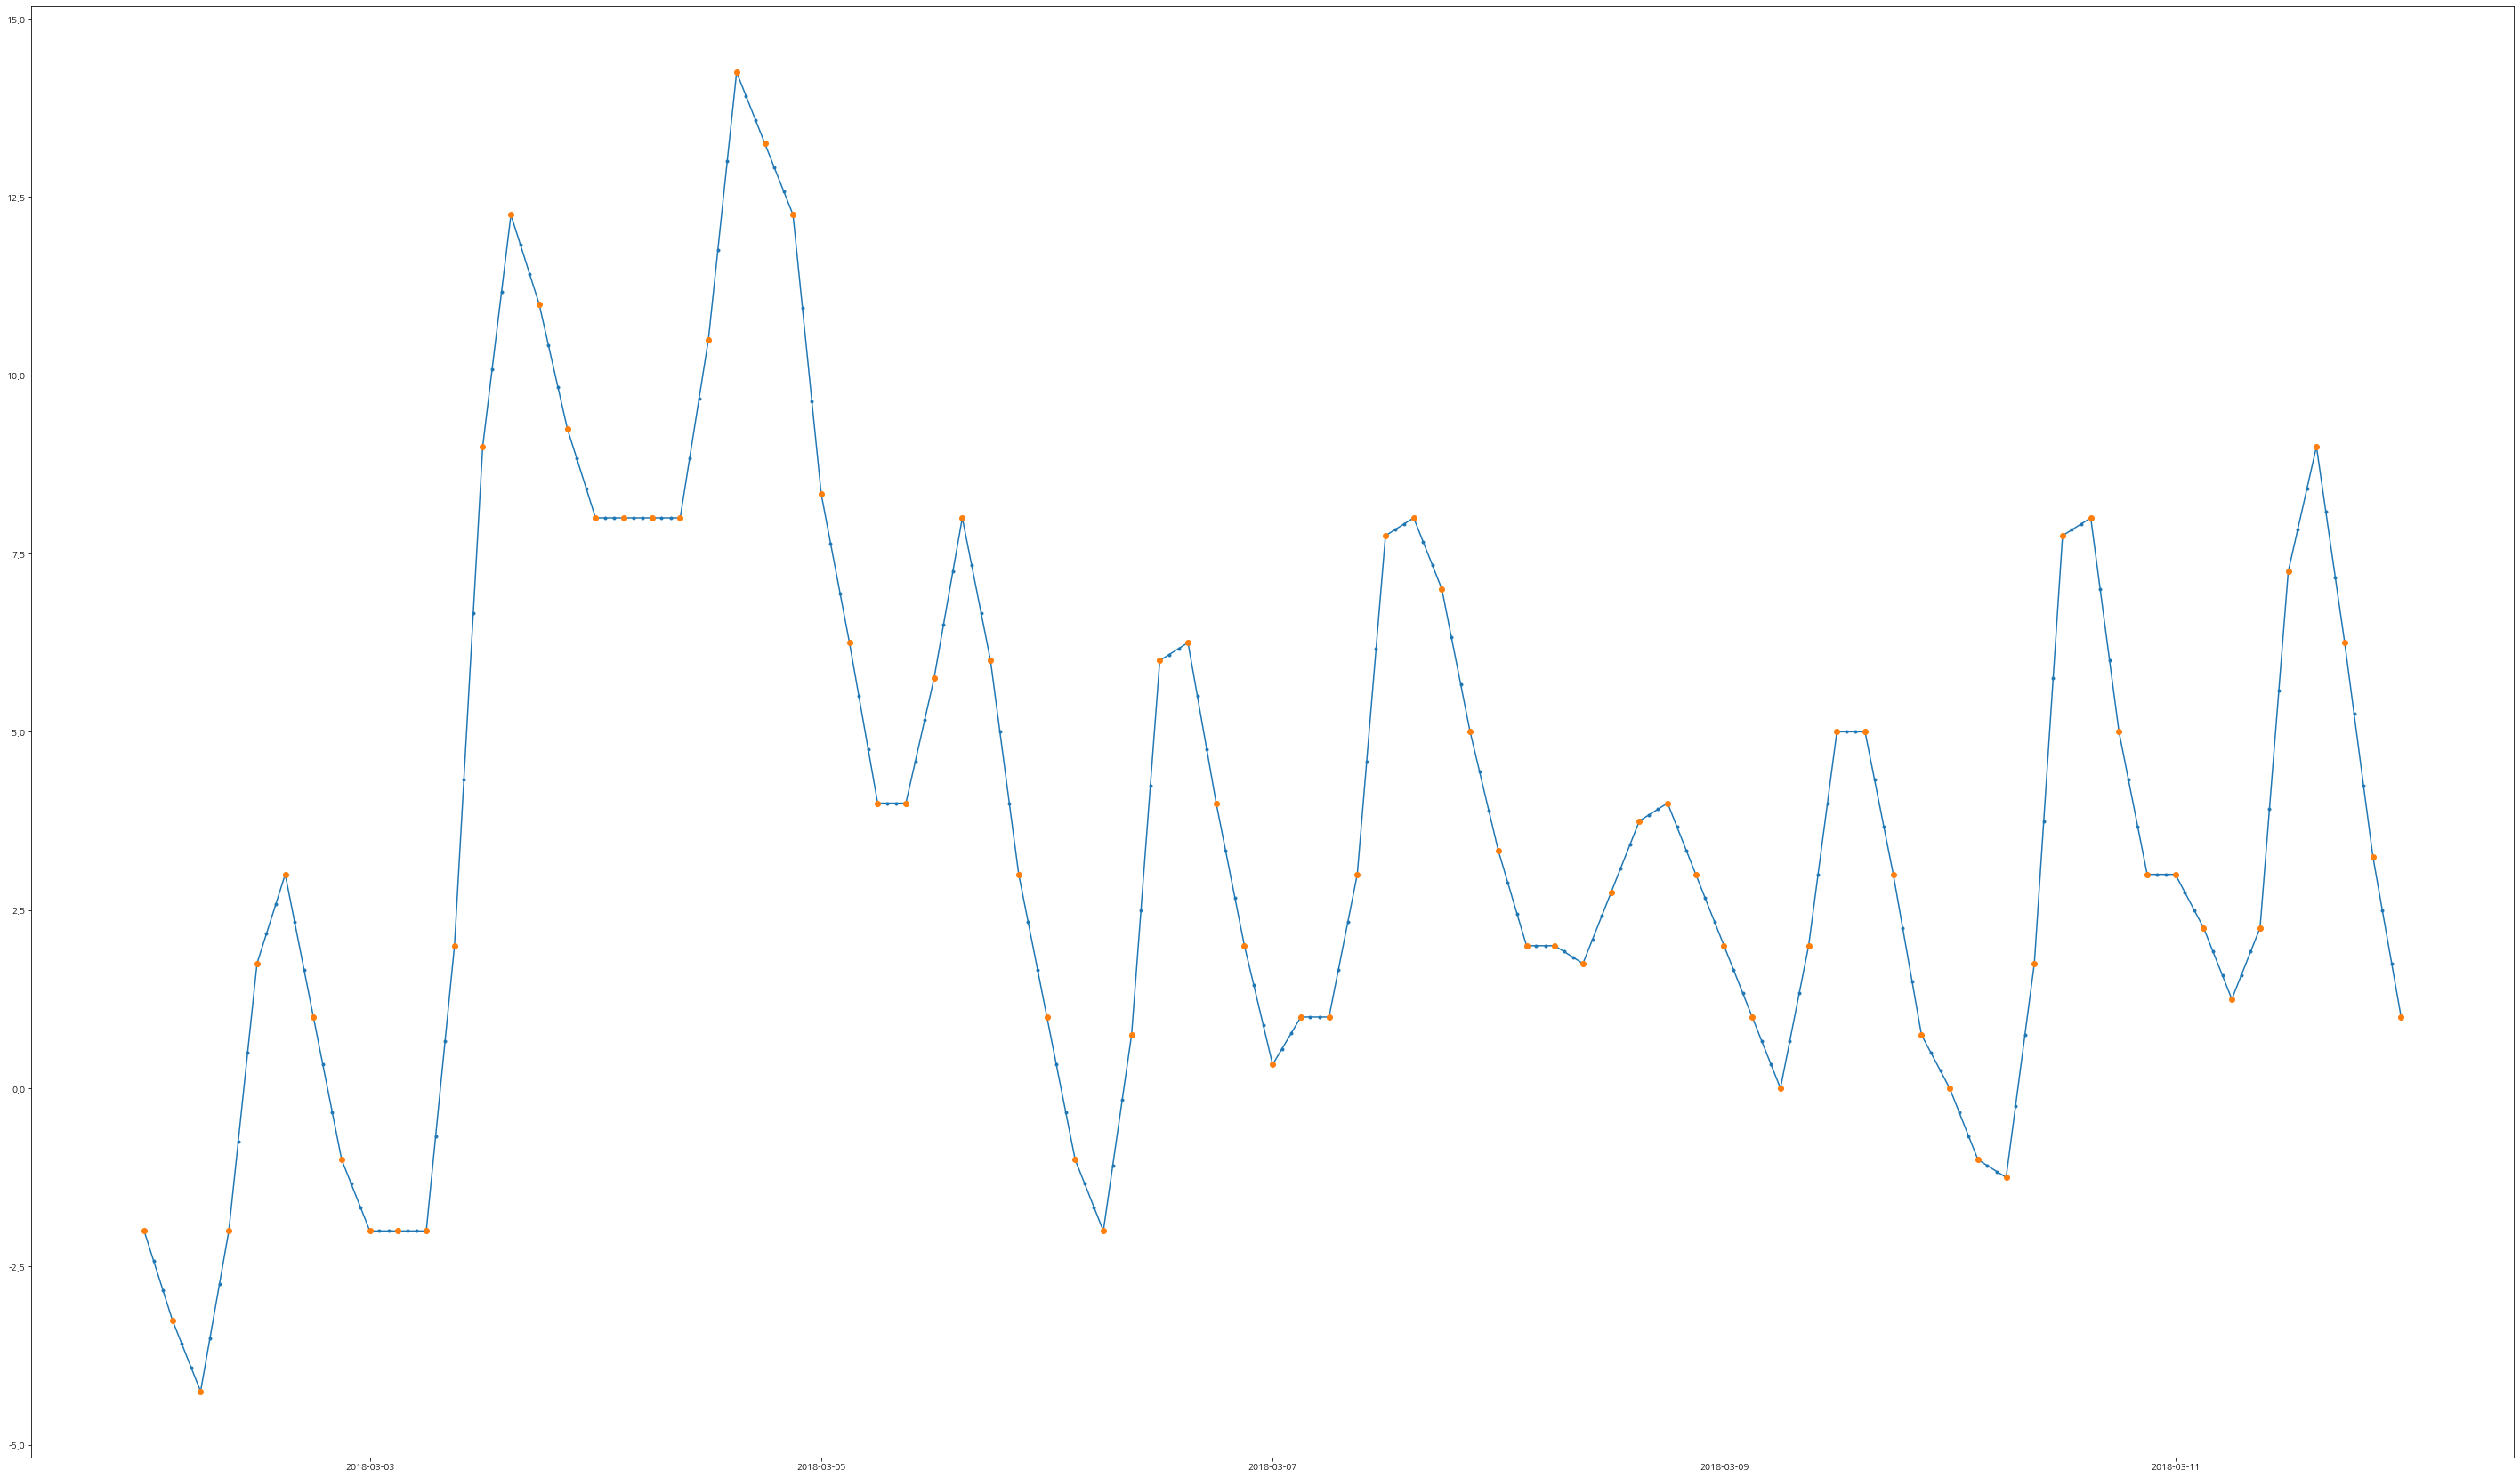

In [28]:
plt.figure(figsize=(50,30))
days = 10
plt.plot(inter_dj_fcst.loc[:24*days, 'fcst_time'], inter_dj_fcst.loc[:24*days, 'Temperature'], '.-')
plt.plot(dj_fcst_full.loc[:24*days, 'fcst_time'], dj_fcst_full.loc[:24*days, 'Temperature'], 'o')

# 실제관측데이터/

In [29]:
dj_obs

,지점,지점명,일시,기온(°C),풍속(m/s),풍향(16방위),습도(%),전운량(10분위)
0,129,서산,2018-03-01 00:00,3.1,3.6,340.0,96.0,NaN
1,129,서산,2018-03-01 01:00,2.8,0.7,140.0,97.0,NaN
2,129,서산,2018-03-01 02:00,2.6,3.2,320.0,95.0,NaN
3,129,서산,2018-03-01 03:00,2.0,1.9,230.0,97.0,NaN
4,129,서산,2018-03-01 04:00,2.2,2.1,180.0,97.0,NaN
...,...,...,...,...,...,...,...,...
25621,129,서산,2021-01-31 19:00,6.7,1.5,200.0,75.0,8.0
25622,129,서산,2021-01-31 20:00,6.2,0.8,200.0,77.0,8.0
25623,129,서산,2021-01-31 21:00,5.3,0.7,230.0,82.0,8.0
25624,129,서산,2021-01-31 22:00,5.8,1.0,200.0,77.0,8.0


In [30]:
dj_obs.isna().sum()

지점              0
지점명             0
일시              0
기온(°C)         37
풍속(m/s)        36
풍향(16방위)       36
습도(%)          35
전운량(10분위)    3970
dtype: int64

In [31]:
dj_obs[dj_obs['기온(°C)'].isna()]

,지점,지점명,일시,기온(°C),풍속(m/s),풍향(16방위),습도(%),전운량(10분위)
8069,129,서산,2019-01-31 11:00,NaN,NaN,NaN,NaN,10.0
8070,129,서산,2019-01-31 12:00,NaN,NaN,NaN,NaN,9.0
8071,129,서산,2019-01-31 13:00,NaN,NaN,NaN,NaN,10.0
9086,129,서산,2019-03-14 20:00,NaN,NaN,NaN,NaN,6.0
9087,129,서산,2019-03-14 21:00,NaN,NaN,NaN,NaN,6.0
9088,129,서산,2019-03-14 22:00,NaN,NaN,NaN,NaN,6.0
9089,129,서산,2019-03-14 23:00,NaN,NaN,NaN,NaN,6.0
9090,129,서산,2019-03-15 00:00,NaN,NaN,NaN,NaN,7.0
10959,129,서산,2019-05-31 21:00,NaN,NaN,NaN,NaN,0.0
10960,129,서산,2019-05-31 22:00,NaN,NaN,NaN,NaN,0.0


In [32]:
import seaborn as sns

In [33]:
dj_obs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25626 entries, 0 to 25625
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   지점         25626 non-null  int64  
 1   지점명        25626 non-null  object 
 2   일시         25626 non-null  object 
 3   기온(°C)     25589 non-null  float64
 4   풍속(m/s)    25590 non-null  float64
 5   풍향(16방위)   25590 non-null  float64
 6   습도(%)      25591 non-null  float64
 7   전운량(10분위)  21656 non-null  float64
dtypes: float64(5), int64(1), object(2)
memory usage: 1.6+ MB


In [34]:
inter_dj_fcst.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26326 entries, 0 to 26325
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   fcst_time      26326 non-null  datetime64[ns]
 1   Temperature    26326 non-null  float64       
 2   Humidity       26326 non-null  float64       
 3   WindSpeed      26326 non-null  float64       
 4   WindDirection  26326 non-null  float64       
 5   Cloud          26326 non-null  float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 2.4 MB


In [35]:
dj_obs['일시'] = pd.to_datetime(dj_obs['일시'], format = '%Y-%m-%d %H:%M:%S', errors='raise')

<AxesSubplot:title={'center':'Dangjin temp'}, xlabel='fcst_time', ylabel='Temperature'>

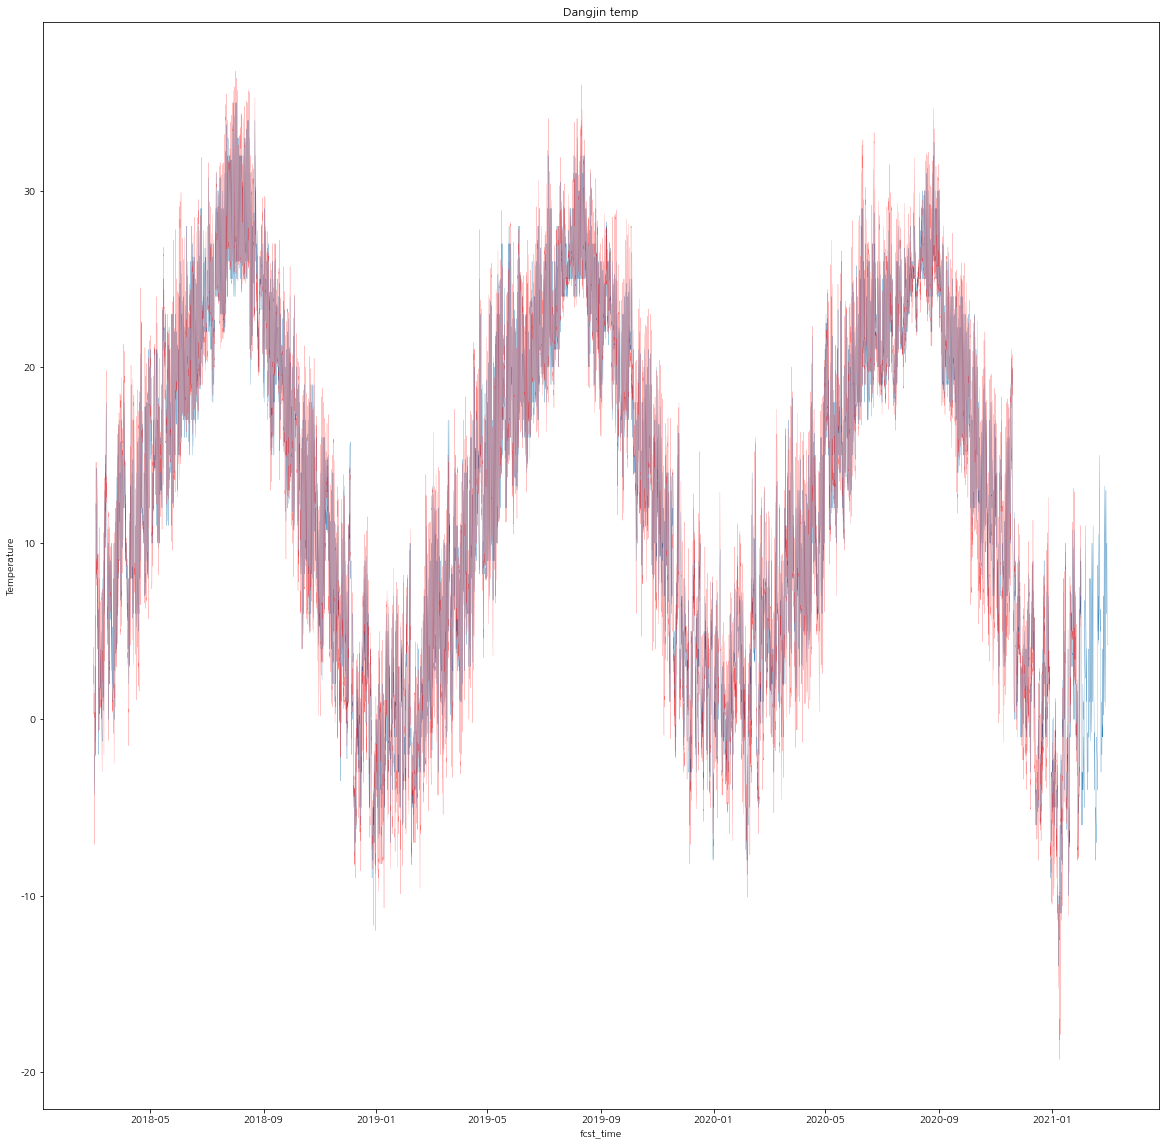

In [36]:
fig = plt.figure(figsize = (20,20))
plt.title('Dangjin temp')
sns.lineplot(data = inter_dj_fcst, x = 'fcst_time', y = 'Temperature', linewidth = 0.2)
sns.lineplot(data = dj_obs, x = '일시', y = '기온(°C)', color = 'red', alpha = 0.6, linewidth = 0.2)

## prophet으로 온도 결측치 처리?

In [37]:
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, plot_components_plotly

In [38]:
dj_obs.head()

,지점,지점명,일시,기온(°C),풍속(m/s),풍향(16방위),습도(%),전운량(10분위)
0,129,서산,2018-03-01 00:00:00,3.1,3.6,340.0,96.0,NaN
1,129,서산,2018-03-01 01:00:00,2.8,0.7,140.0,97.0,NaN
2,129,서산,2018-03-01 02:00:00,2.6,3.2,320.0,95.0,NaN
3,129,서산,2018-03-01 03:00:00,2.0,1.9,230.0,97.0,NaN
4,129,서산,2018-03-01 04:00:00,2.2,2.1,180.0,97.0,NaN


In [39]:
dj_prophet = pd.DataFrame()

In [40]:
dj_prophet['ds'] = dj_obs['일시']
dj_prophet['y'] = dj_obs['기온(°C)']

In [41]:
dj_prophet.isna().sum()

ds     0
y     37
dtype: int64

In [42]:
model = Prophet(yearly_seasonality=True,
               weekly_seasonality=True)

model.fit(dj_prophet)

In [43]:
dj_prophet.tail()

,ds,y
25621,2021-01-31 19:00:00,6.7
25622,2021-01-31 20:00:00,6.2
25623,2021-01-31 21:00:00,5.3
25624,2021-01-31 22:00:00,5.8
25625,2021-01-31 23:00:00,5.3


In [44]:
future = model.make_future_dataframe(periods=0)
future.tail()

,ds
25621,2021-01-31 19:00:00
25622,2021-01-31 20:00:00
25623,2021-01-31 21:00:00
25624,2021-01-31 22:00:00
25625,2021-01-31 23:00:00


In [45]:
forecast = model.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
25621,2021-01-31 19:00:00,11.471796,-3.170185,4.662801,11.471796,11.471796,-10.599867,-10.599867,-10.599867,0.644164,...,0.064597,0.064597,0.064597,-11.308628,-11.308628,-11.308628,0.0,0.0,0.0,0.871929
25622,2021-01-31 20:00:00,11.471604,-4.503837,3.643807,11.471604,11.471604,-11.629419,-11.629419,-11.629419,-0.381574,...,0.063198,0.063198,0.063198,-11.311043,-11.311043,-11.311043,0.0,0.0,0.0,-0.157815
25623,2021-01-31 21:00:00,11.471412,-4.816733,3.309833,11.471412,11.471412,-12.316838,-12.316838,-12.316838,-1.064852,...,0.061496,0.061496,0.061496,-11.313483,-11.313483,-11.313483,0.0,0.0,0.0,-0.845426
25624,2021-01-31 22:00:00,11.471220,-5.514011,2.882853,11.471220,11.471220,-12.775292,-12.775292,-12.775292,-1.518851,...,0.059506,0.059506,0.059506,-11.315947,-11.315947,-11.315947,0.0,0.0,0.0,-1.304072
25625,2021-01-31 23:00:00,11.471029,-5.738604,2.643955,11.471029,11.471029,-13.166852,-13.166852,-13.166852,-1.905661,...,0.057246,0.057246,0.057246,-11.318436,-11.318436,-11.318436,0.0,0.0,0.0,-1.695823


In [46]:
forecast[['ds','trend','yhat']]

,ds,trend,yhat
0,2018-03-01 00:00:00,13.208380,1.879868
1,2018-03-01 01:00:00,13.208564,1.560121
2,2018-03-01 02:00:00,13.208748,1.344695
3,2018-03-01 03:00:00,13.208932,1.173471
4,2018-03-01 04:00:00,13.209116,0.947855
...,...,...,...
25621,2021-01-31 19:00:00,11.471796,0.871929
25622,2021-01-31 20:00:00,11.471604,-0.157815
25623,2021-01-31 21:00:00,11.471412,-0.845426
25624,2021-01-31 22:00:00,11.471220,-1.304072


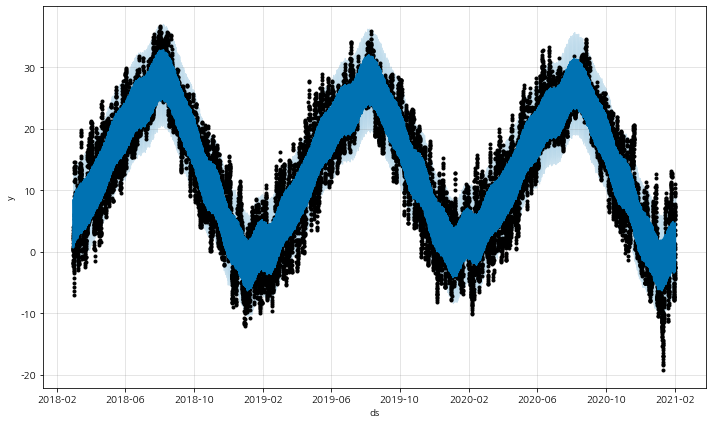

In [47]:
fig = model.plot(forecast)

In [48]:
missing_index = dj_obs[dj_obs['기온(°C)'].isna()].index.tolist()

#### neural prophte

In [70]:
pip install neuralprophet[live]

  Using cached neuralprophet-0.2.7-py3-none-any.whl (56 kB)
Note: you may need to restart the kernel to use updated packages.


ERROR: Cannot install neuralprophet[live]==0.2.5, neuralprophet[live]==0.2.6 and neuralprophet[live]==0.2.7 because these package versions have conflicting dependencies.
ERROR: ResolutionImpossible: for help visit https://pip.pypa.io/en/latest/user_guide/#fixing-conflicting-dependencies


  Using cached neuralprophet-0.2.6-py3-none-any.whl (55 kB)
  Using cached neuralprophet-0.2.5-py3-none-any.whl (54 kB)

The conflict is caused by:
    neuralprophet[live] 0.2.7 depends on torch<1.7.0 and >=1.4.0
    neuralprophet[live] 0.2.6 depends on torch<1.7.0 and >=1.4.0
    neuralprophet[live] 0.2.5 depends on torch<1.7.0 and >=1.4.0

To fix this you could try to:
1. loosen the range of package versions you've specified
2. remove package versions to allow pip attempt to solve the dependency conflict



In [69]:
from neuralprophet import NeuralProphet

ModuleNotFoundError: No module named 'neuralprophet'

In [71]:
import torch

In [72]:
print(torch.__version__)

1.7.1+cpu


#### prophet으로 예측한 missing temparature

In [44]:
forecast.loc[missing_index]['yhat'][8069]

3.222344729115534

#### 결측치 채워주기

In [132]:
for i in missing_index:
    dj_obs['기온(°C)'][i] = forecast.loc[missing_index]['yhat'][i]

<ipython-input-132-f368fd45a020>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dj_obs['기온(°C)'][i] = forecast.loc[missing_index]['yhat'][i]


In [133]:
dj_obs['기온(°C)'].isna().sum()

0

In [134]:
inter_dj_fcst

,fcst_time,Temperature,Humidity,WindSpeed,WindDirection,Cloud
0,2018-03-02 00:00:00,-2.000000,51.666667,6.100,336.000000,1.0
1,2018-03-02 01:00:00,-2.416667,52.777778,5.775,337.000000,1.0
2,2018-03-02 02:00:00,-2.833333,53.888889,5.450,338.000000,1.0
3,2018-03-02 03:00:00,-3.250000,55.000000,5.125,339.000000,1.0
4,2018-03-02 04:00:00,-3.583333,56.666667,4.800,342.916667,1.0
...,...,...,...,...,...,...
26321,2021-03-02 17:00:00,4.250000,81.250000,6.875,27.000000,4.0
26322,2021-03-02 18:00:00,4.250000,81.250000,6.875,27.000000,4.0
26323,2021-03-02 19:00:00,4.250000,81.250000,6.875,27.000000,4.0
26324,2021-03-02 20:00:00,4.250000,81.250000,6.875,27.000000,4.0


#### 18-03-02 00:00 부터 21-01-31까지만 데이터 비교

In [49]:
real_dj = dj_obs.iloc[24:]

In [50]:
real_dj

,지점,지점명,일시,기온(°C),풍속(m/s),풍향(16방위),습도(%),전운량(10분위)
24,129,서산,2018-03-02 00:00:00,-2.7,3.7,360.0,56.0,NaN
25,129,서산,2018-03-02 01:00:00,-2.8,3.8,360.0,53.0,NaN
26,129,서산,2018-03-02 02:00:00,-3.2,2.5,360.0,52.0,NaN
27,129,서산,2018-03-02 03:00:00,-3.5,2.6,20.0,50.0,NaN
28,129,서산,2018-03-02 04:00:00,-4.2,1.4,50.0,55.0,NaN
...,...,...,...,...,...,...,...,...
25621,129,서산,2021-01-31 19:00:00,6.7,1.5,200.0,75.0,8.0
25622,129,서산,2021-01-31 20:00:00,6.2,0.8,200.0,77.0,8.0
25623,129,서산,2021-01-31 21:00:00,5.3,0.7,230.0,82.0,8.0
25624,129,서산,2021-01-31 22:00:00,5.8,1.0,200.0,77.0,8.0


In [51]:
predict_dj = inter_dj_fcst[:25608]

In [52]:
predict_dj

,fcst_time,Temperature,Humidity,WindSpeed,WindDirection,Cloud
0,2018-03-02 00:00:00,-2.000000,51.666667,6.100000,336.000000,1.0
1,2018-03-02 01:00:00,-2.416667,52.777778,5.775000,337.000000,1.0
2,2018-03-02 02:00:00,-2.833333,53.888889,5.450000,338.000000,1.0
3,2018-03-02 03:00:00,-3.250000,55.000000,5.125000,339.000000,1.0
4,2018-03-02 04:00:00,-3.583333,56.666667,4.800000,342.916667,1.0
...,...,...,...,...,...,...
25603,2021-01-31 19:00:00,5.916667,76.666667,3.491667,178.166667,4.0
25604,2021-01-31 20:00:00,5.833333,78.333333,3.658333,172.583333,4.0
25605,2021-01-31 21:00:00,5.750000,80.000000,3.825000,167.000000,4.0
25606,2021-01-31 22:00:00,6.055556,80.000000,4.505556,170.111111,4.0


In [53]:
real_dj.reset_index(inplace=True)

In [54]:
real_dj.drop(['index'],axis=1, inplace=True)

C:\Users\LEE\anaconda3\lib\site-packages\pandas\core\frame.py:4305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [55]:
predict_dj['fcst_time'].duplicated().sum()

0

In [56]:
lst1 = real_dj.일시.tolist()

In [57]:
lst2 = predict_dj.fcst_time.tolist()

In [58]:
set(lst2)-set(lst1)

{Timestamp('2018-07-24 11:00:00'),
 Timestamp('2018-07-24 12:00:00'),
 Timestamp('2018-07-24 13:00:00'),
 Timestamp('2018-07-24 14:00:00'),
 Timestamp('2018-07-24 15:00:00'),
 Timestamp('2018-07-24 16:00:00')}

In [59]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

#### 당진 관측데이터 18.07.24 11시부터 16시 데이터 누락

In [60]:
dj_obs.iloc[3400:3600]

,지점,지점명,일시,기온(°C),풍속(m/s),풍향(16방위),습도(%),전운량(10분위)
3400,129,서산,2018-07-20 16:00:00,32.0,2.7,340.0,55.0,NaN
3401,129,서산,2018-07-20 17:00:00,31.9,2.2,360.0,53.0,NaN
3402,129,서산,2018-07-20 18:00:00,30.7,2.6,360.0,55.0,NaN
3403,129,서산,2018-07-20 19:00:00,29.1,1.6,360.0,62.0,NaN
3404,129,서산,2018-07-20 20:00:00,27.0,0.7,20.0,72.0,NaN
3405,129,서산,2018-07-20 21:00:00,25.9,0.8,20.0,76.0,NaN
3406,129,서산,2018-07-20 22:00:00,25.2,1.5,20.0,75.0,NaN
3407,129,서산,2018-07-20 23:00:00,23.7,1.9,50.0,86.0,NaN
3408,129,서산,2018-07-21 00:00:00,23.2,1.3,20.0,87.0,NaN
3409,129,서산,2018-07-21 01:00:00,23.0,0.6,20.0,84.0,NaN


In [61]:
real_dj.columns

Index(['지점', '지점명', '일시', '기온(°C)', '풍속(m/s)', '풍향(16방위)', '습도(%)', '전운량(10분위)'], dtype='object')

In [62]:
dj_july = pd.DataFrame(columns = ['지점', '지점명', '일시', '기온(°C)', '풍속(m/s)', '풍향(16방위)', '습도(%)', '전운량(10분위)'])

In [63]:
ts_ms = pd.date_range(start = '2018-07-24 11:00:00',     # 날짜 범위 시작
                     end = '2018-07-24 16:00:00',                # 날짜 범위 끝
                     freq = 'H')

In [64]:
ts_ms

DatetimeIndex(['2018-07-24 11:00:00', '2018-07-24 12:00:00', '2018-07-24 13:00:00', '2018-07-24 14:00:00', '2018-07-24 15:00:00', '2018-07-24 16:00:00'], dtype='datetime64[ns]', freq='H')

In [65]:
dj_july.일시 = ts_ms

In [66]:
dj_july

,지점,지점명,일시,기온(°C),풍속(m/s),풍향(16방위),습도(%),전운량(10분위)
0,NaN,NaN,2018-07-24 11:00:00,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2018-07-24 12:00:00,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,2018-07-24 13:00:00,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,2018-07-24 14:00:00,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,2018-07-24 15:00:00,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2018-07-24 16:00:00,NaN,NaN,NaN,NaN,NaN


In [67]:
real_dj = pd.concat([real_dj, dj_july])

In [68]:
real_dj.reset_index(inplace=True)

In [69]:
real_dj.drop(['index'], axis=1, inplace=True)

In [70]:
real_dj.sort_values(by = '일시', inplace=True)

In [71]:
real_dj.isnull().sum()

지점              6
지점명             6
일시              0
기온(°C)         43
풍속(m/s)        42
풍향(16방위)       42
습도(%)          41
전운량(10분위)    3952
dtype: int64

In [72]:
real_dj.지점.fillna('129', inplace=True)

In [73]:
real_dj.지점명.fillna('서산', inplace=True)

In [74]:
missing_index_temp = real_dj[real_dj['기온(°C)'].isna()].index.tolist()

In [75]:
len(missing_index_temp)

43

In [76]:
real_dj.isna().sum()

지점              0
지점명             0
일시              0
기온(°C)         43
풍속(m/s)        42
풍향(16방위)       42
습도(%)          41
전운량(10분위)    3952
dtype: int64

## 결측데이터 채워주기, 18.07.24. 날짜 추가 후, 기온, 풍속, 풍향, 습도 등 결측값 채워준다 prophet으로

In [77]:
prophet_real = pd.DataFrame()

In [78]:
prophet_real['ds'] = real_dj['일시']
prophet_real['y'] = real_dj['기온(°C)']

In [79]:
prophet_real.isna().sum()

ds     0
y     43
dtype: int64

In [80]:
model = Prophet(yearly_seasonality=True,
               weekly_seasonality=True)

model.fit(prophet_real)

In [81]:
preds_missing = model.make_future_dataframe(periods=0)
preds_missing.tail()

,ds
25603,2021-01-31 19:00:00
25604,2021-01-31 20:00:00
25605,2021-01-31 21:00:00
25606,2021-01-31 22:00:00
25607,2021-01-31 23:00:00


In [82]:
missing_values_temp = model.predict(preds_missing)
missing_values_temp.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
25603,2021-01-31 19:00:00,11.302962,-3.274767,4.863029,11.302962,11.302962,-10.480144,-10.480144,-10.480144,0.646798,0.646798,0.646798,0.060297,0.060297,0.060297,-11.187238,-11.187238,-11.187238,0.0,0.0,0.0,0.822818
25604,2021-01-31 20:00:00,11.302721,-4.100916,3.579502,11.302721,11.302721,-11.510338,-11.510338,-11.510338,-0.379063,-0.379063,-0.379063,0.058473,0.058473,0.058473,-11.189747,-11.189747,-11.189747,0.0,0.0,0.0,-0.207616
25605,2021-01-31 21:00:00,11.302481,-4.775437,3.331522,11.302481,11.302481,-12.198585,-12.198585,-12.198585,-1.062676,-1.062676,-1.062676,0.056372,0.056372,0.056372,-11.192280,-11.192280,-11.192280,0.0,0.0,0.0,-0.896104
25606,2021-01-31 22:00:00,11.302241,-5.334349,2.558929,11.302241,11.302241,-12.658653,-12.658653,-12.658653,-1.517830,-1.517830,-1.517830,0.054014,0.054014,0.054014,-11.194837,-11.194837,-11.194837,0.0,0.0,0.0,-1.356412
25607,2021-01-31 23:00:00,11.302000,-5.640774,2.068658,11.302000,11.302000,-13.052573,-13.052573,-13.052573,-1.906577,-1.906577,-1.906577,0.051423,0.051423,0.051423,-11.197418,-11.197418,-11.197418,0.0,0.0,0.0,-1.750572


In [83]:
len(missing_index_temp)

43

### 온도 결측치 채움

In [84]:
missing_values_temp.sort_values(by='ds', inplace =True)

In [85]:
missing_values_temp

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-03-02 00:00:00,13.398636,-1.983228,5.998604,13.398636,13.398636,-11.289158,-11.289158,-11.289158,-2.285189,-2.285189,-2.285189,-0.233581,-0.233581,-0.233581,-8.770387,-8.770387,-8.770387,0.0,0.0,0.0,2.109478
1,2018-03-02 01:00:00,13.398758,-2.129527,5.909906,13.398758,13.398758,-11.596716,-11.596716,-11.596716,-2.599812,-2.599812,-2.599812,-0.236320,-0.236320,-0.236320,-8.760583,-8.760583,-8.760583,0.0,0.0,0.0,1.802042
2,2018-03-02 02:00:00,13.398880,-2.668621,5.437511,13.398880,13.398880,-11.797934,-11.797934,-11.797934,-2.808985,-2.808985,-2.808985,-0.238155,-0.238155,-0.238155,-8.750794,-8.750794,-8.750794,0.0,0.0,0.0,1.600946
3,2018-03-02 03:00:00,13.399002,-2.655743,5.417536,13.399002,13.399002,-11.953588,-11.953588,-11.953588,-2.973460,-2.973460,-2.973460,-0.239107,-0.239107,-0.239107,-8.741021,-8.741021,-8.741021,0.0,0.0,0.0,1.445414
4,2018-03-02 04:00:00,13.399124,-2.841331,5.349397,13.399124,13.399124,-12.163002,-12.163002,-12.163002,-3.192537,-3.192537,-3.192537,-0.239202,-0.239202,-0.239202,-8.731264,-8.731264,-8.731264,0.0,0.0,0.0,1.236122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25603,2021-01-31 19:00:00,11.302962,-3.274767,4.863029,11.302962,11.302962,-10.480144,-10.480144,-10.480144,0.646798,0.646798,0.646798,0.060297,0.060297,0.060297,-11.187238,-11.187238,-11.187238,0.0,0.0,0.0,0.822818
25604,2021-01-31 20:00:00,11.302721,-4.100916,3.579502,11.302721,11.302721,-11.510338,-11.510338,-11.510338,-0.379063,-0.379063,-0.379063,0.058473,0.058473,0.058473,-11.189747,-11.189747,-11.189747,0.0,0.0,0.0,-0.207616
25605,2021-01-31 21:00:00,11.302481,-4.775437,3.331522,11.302481,11.302481,-12.198585,-12.198585,-12.198585,-1.062676,-1.062676,-1.062676,0.056372,0.056372,0.056372,-11.192280,-11.192280,-11.192280,0.0,0.0,0.0,-0.896104
25606,2021-01-31 22:00:00,11.302241,-5.334349,2.558929,11.302241,11.302241,-12.658653,-12.658653,-12.658653,-1.517830,-1.517830,-1.517830,0.054014,0.054014,0.054014,-11.194837,-11.194837,-11.194837,0.0,0.0,0.0,-1.356412


In [86]:
missing_values_temp.loc[21813]

ds                            2020-08-26 21:00:00
trend                                   12.213811
yhat_lower                              19.502080
yhat_upper                              27.413958
trend_lower                             12.213811
trend_upper                             12.213811
additive_terms                          11.408231
additive_terms_lower                    11.408231
additive_terms_upper                    11.408231
daily                                   -1.062676
daily_lower                             -1.062676
daily_upper                             -1.062676
weekly                                   0.100365
weekly_lower                             0.100365
weekly_upper                             0.100365
yearly                                  12.370542
yearly_lower                            12.370542
yearly_upper                            12.370542
multiplicative_terms                     0.000000
multiplicative_terms_lower               0.000000


In [87]:
real_dj.reset_index(inplace=True)

In [89]:
real_dj.drop(['index'], axis=1, inplace=True)

In [90]:
real_dj

,지점,지점명,일시,기온(°C),풍속(m/s),풍향(16방위),습도(%),전운량(10분위)
0,129,서산,2018-03-02 00:00:00,-2.7,3.7,360.0,56.0,NaN
1,129,서산,2018-03-02 01:00:00,-2.8,3.8,360.0,53.0,NaN
2,129,서산,2018-03-02 02:00:00,-3.2,2.5,360.0,52.0,NaN
3,129,서산,2018-03-02 03:00:00,-3.5,2.6,20.0,50.0,NaN
4,129,서산,2018-03-02 04:00:00,-4.2,1.4,50.0,55.0,NaN
...,...,...,...,...,...,...,...,...
25603,129,서산,2021-01-31 19:00:00,6.7,1.5,200.0,75.0,8.0
25604,129,서산,2021-01-31 20:00:00,6.2,0.8,200.0,77.0,8.0
25605,129,서산,2021-01-31 21:00:00,5.3,0.7,230.0,82.0,8.0
25606,129,서산,2021-01-31 22:00:00,5.8,1.0,200.0,77.0,8.0


In [91]:
real_dj[real_dj['기온(°C)'].isna()]

,지점,지점명,일시,기온(°C),풍속(m/s),풍향(16방위),습도(%),전운량(10분위)
3467,129,서산,2018-07-24 11:00:00,NaN,NaN,NaN,NaN,NaN
3468,129,서산,2018-07-24 12:00:00,NaN,NaN,NaN,NaN,NaN
3469,129,서산,2018-07-24 13:00:00,NaN,NaN,NaN,NaN,NaN
3470,129,서산,2018-07-24 14:00:00,NaN,NaN,NaN,NaN,NaN
3471,129,서산,2018-07-24 15:00:00,NaN,NaN,NaN,NaN,NaN
3472,129,서산,2018-07-24 16:00:00,NaN,NaN,NaN,NaN,NaN
8051,129,서산,2019-01-31 11:00:00,NaN,NaN,NaN,NaN,10.0
8052,129,서산,2019-01-31 12:00:00,NaN,NaN,NaN,NaN,9.0
8053,129,서산,2019-01-31 13:00:00,NaN,NaN,NaN,NaN,10.0
9068,129,서산,2019-03-14 20:00:00,NaN,NaN,NaN,NaN,6.0


In [92]:
missing_index_temp = real_dj[real_dj['기온(°C)'].isna()].index.tolist()

In [93]:
missing_index_temp

[3467,
 3468,
 3469,
 3470,
 3471,
 3472,
 8051,
 8052,
 8053,
 9068,
 9069,
 9070,
 9071,
 9072,
 10941,
 10942,
 10943,
 10946,
 10947,
 10948,
 10949,
 10950,
 10951,
 10952,
 10953,
 12242,
 12243,
 12244,
 12245,
 12246,
 12247,
 12432,
 12433,
 12434,
 12435,
 12436,
 12437,
 12438,
 12439,
 13885,
 16164,
 21801,
 21813]

In [94]:
real_dj

,지점,지점명,일시,기온(°C),풍속(m/s),풍향(16방위),습도(%),전운량(10분위)
0,129,서산,2018-03-02 00:00:00,-2.7,3.7,360.0,56.0,NaN
1,129,서산,2018-03-02 01:00:00,-2.8,3.8,360.0,53.0,NaN
2,129,서산,2018-03-02 02:00:00,-3.2,2.5,360.0,52.0,NaN
3,129,서산,2018-03-02 03:00:00,-3.5,2.6,20.0,50.0,NaN
4,129,서산,2018-03-02 04:00:00,-4.2,1.4,50.0,55.0,NaN
...,...,...,...,...,...,...,...,...
25603,129,서산,2021-01-31 19:00:00,6.7,1.5,200.0,75.0,8.0
25604,129,서산,2021-01-31 20:00:00,6.2,0.8,200.0,77.0,8.0
25605,129,서산,2021-01-31 21:00:00,5.3,0.7,230.0,82.0,8.0
25606,129,서산,2021-01-31 22:00:00,5.8,1.0,200.0,77.0,8.0


In [95]:
for i in missing_index_temp:
    real_dj['기온(°C)'][i] = missing_values_temp.loc[missing_index_temp]['yhat'][i]

<ipython-input-95-28df8b087d2c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_dj['기온(°C)'][i] = missing_values_temp.loc[missing_index_temp]['yhat'][i]


In [96]:
real_dj.isna().sum()

지점              0
지점명             0
일시              0
기온(°C)          0
풍속(m/s)        42
풍향(16방위)       42
습도(%)          41
전운량(10분위)    3952
dtype: int64

In [97]:
real_dj.loc[missing_index_temp]

,지점,지점명,일시,기온(°C),풍속(m/s),풍향(16방위),습도(%),전운량(10분위)
3467,129,서산,2018-07-24 11:00:00,30.071071,NaN,NaN,NaN,NaN
3468,129,서산,2018-07-24 12:00:00,30.979099,NaN,NaN,NaN,NaN
3469,129,서산,2018-07-24 13:00:00,31.499030,NaN,NaN,NaN,NaN
3470,129,서산,2018-07-24 14:00:00,31.764379,NaN,NaN,NaN,NaN
3471,129,서산,2018-07-24 15:00:00,31.770317,NaN,NaN,NaN,NaN
3472,129,서산,2018-07-24 16:00:00,31.382443,NaN,NaN,NaN,NaN
8051,129,서산,2019-01-31 11:00:00,3.202683,NaN,NaN,NaN,10.0
8052,129,서산,2019-01-31 12:00:00,4.078838,NaN,NaN,NaN,9.0
8053,129,서산,2019-01-31 13:00:00,4.567388,NaN,NaN,NaN,10.0
9068,129,서산,2019-03-14 20:00:00,4.942409,NaN,NaN,NaN,6.0


In [98]:
real_dj.isna().sum()

지점              0
지점명             0
일시              0
기온(°C)          0
풍속(m/s)        42
풍향(16방위)       42
습도(%)          41
전운량(10분위)    3952
dtype: int64

In [99]:
real_dj

,지점,지점명,일시,기온(°C),풍속(m/s),풍향(16방위),습도(%),전운량(10분위)
0,129,서산,2018-03-02 00:00:00,-2.7,3.7,360.0,56.0,NaN
1,129,서산,2018-03-02 01:00:00,-2.8,3.8,360.0,53.0,NaN
2,129,서산,2018-03-02 02:00:00,-3.2,2.5,360.0,52.0,NaN
3,129,서산,2018-03-02 03:00:00,-3.5,2.6,20.0,50.0,NaN
4,129,서산,2018-03-02 04:00:00,-4.2,1.4,50.0,55.0,NaN
...,...,...,...,...,...,...,...,...
25603,129,서산,2021-01-31 19:00:00,6.7,1.5,200.0,75.0,8.0
25604,129,서산,2021-01-31 20:00:00,6.2,0.8,200.0,77.0,8.0
25605,129,서산,2021-01-31 21:00:00,5.3,0.7,230.0,82.0,8.0
25606,129,서산,2021-01-31 22:00:00,5.8,1.0,200.0,77.0,8.0


### 풍속 채우기

In [100]:
prophet_realwind = pd.DataFrame()

In [101]:
prophet_realwind['ds'] = real_dj['일시']
prophet_realwind['y'] = real_dj['풍속(m/s)']

In [102]:
prophet_realwind.isna().sum()

ds     0
y     42
dtype: int64

In [103]:
model = Prophet(yearly_seasonality=True,
               weekly_seasonality=True)

model.fit(prophet_realwind)

In [104]:
missing_values_wind = model.predict(preds_missing)
missing_values_wind.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
25603,2021-01-31 19:00:00,1.955460,0.422549,3.656756,1.955460,1.955460,0.081705,0.081705,0.081705,0.034619,0.034619,0.034619,-0.076868,-0.076868,-0.076868,0.123954,0.123954,0.123954,0.0,0.0,0.0,2.037165
25604,2021-01-31 20:00:00,1.955453,0.012973,3.435041,1.955453,1.955453,-0.262167,-0.262167,-0.262167,-0.317105,-0.317105,-0.317105,-0.069404,-0.069404,-0.069404,0.124343,0.124343,0.124343,0.0,0.0,0.0,1.693286
25605,2021-01-31 21:00:00,1.955446,-0.156935,3.247729,1.955446,1.955446,-0.435187,-0.435187,-0.435187,-0.498113,-0.498113,-0.498113,-0.061798,-0.061798,-0.061798,0.124724,0.124724,0.124724,0.0,0.0,0.0,1.520259
25606,2021-01-31 22:00:00,1.955440,-0.253520,3.026539,1.955440,1.955440,-0.489373,-0.489373,-0.489373,-0.560332,-0.560332,-0.560332,-0.054138,-0.054138,-0.054138,0.125098,0.125098,0.125098,0.0,0.0,0.0,1.466067
25607,2021-01-31 23:00:00,1.955433,-0.128915,3.023294,1.955433,1.955433,-0.514452,-0.514452,-0.514452,-0.593404,-0.593404,-0.593404,-0.046513,-0.046513,-0.046513,0.125464,0.125464,0.125464,0.0,0.0,0.0,1.440981


In [105]:
missing_index_wind = real_dj[real_dj['풍속(m/s)'].isna()].index.tolist()

In [106]:
len(missing_values_wind.loc[missing_index_wind])

42

In [107]:
real_dj.loc[missing_index_wind]

,지점,지점명,일시,기온(°C),풍속(m/s),풍향(16방위),습도(%),전운량(10분위)
3467,129,서산,2018-07-24 11:00:00,30.071071,NaN,NaN,NaN,NaN
3468,129,서산,2018-07-24 12:00:00,30.979099,NaN,NaN,NaN,NaN
3469,129,서산,2018-07-24 13:00:00,31.499030,NaN,NaN,NaN,NaN
3470,129,서산,2018-07-24 14:00:00,31.764379,NaN,NaN,NaN,NaN
3471,129,서산,2018-07-24 15:00:00,31.770317,NaN,NaN,NaN,NaN
3472,129,서산,2018-07-24 16:00:00,31.382443,NaN,NaN,NaN,NaN
8051,129,서산,2019-01-31 11:00:00,3.202683,NaN,NaN,NaN,10.0
8052,129,서산,2019-01-31 12:00:00,4.078838,NaN,NaN,NaN,9.0
8053,129,서산,2019-01-31 13:00:00,4.567388,NaN,NaN,NaN,10.0
9068,129,서산,2019-03-14 20:00:00,4.942409,NaN,NaN,NaN,6.0


In [108]:
for i in missing_index_wind:
    real_dj['풍속(m/s)'][i] = missing_values_wind.loc[missing_index_wind]['yhat'][i]

<ipython-input-108-ce4af10df85a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_dj['풍속(m/s)'][i] = missing_values_wind.loc[missing_index_wind]['yhat'][i]


In [109]:
real_dj.loc[missing_index_wind]

,지점,지점명,일시,기온(°C),풍속(m/s),풍향(16방위),습도(%),전운량(10분위)
3467,129,서산,2018-07-24 11:00:00,30.071071,2.549731,NaN,NaN,NaN
3468,129,서산,2018-07-24 12:00:00,30.979099,2.839657,NaN,NaN,NaN
3469,129,서산,2018-07-24 13:00:00,31.499030,3.054757,NaN,NaN,NaN
3470,129,서산,2018-07-24 14:00:00,31.764379,3.214241,NaN,NaN,NaN
3471,129,서산,2018-07-24 15:00:00,31.770317,3.286538,NaN,NaN,NaN
3472,129,서산,2018-07-24 16:00:00,31.382443,3.197776,NaN,NaN,NaN
8051,129,서산,2019-01-31 11:00:00,3.202683,2.622201,NaN,NaN,10.0
8052,129,서산,2019-01-31 12:00:00,4.078838,2.904385,NaN,NaN,9.0
8053,129,서산,2019-01-31 13:00:00,4.567388,3.110854,NaN,NaN,10.0
9068,129,서산,2019-03-14 20:00:00,4.942409,2.061989,NaN,NaN,6.0


In [110]:
real_dj.isna().sum()

지점              0
지점명             0
일시              0
기온(°C)          0
풍속(m/s)         0
풍향(16방위)       42
습도(%)          41
전운량(10분위)    3952
dtype: int64

## 습도 채워주기

In [111]:
missing_index_humidity = real_dj[real_dj['습도(%)'].isna()].index.tolist()

In [112]:
prophet_realhumidity = pd.DataFrame()

In [113]:
prophet_realhumidity['ds'] = real_dj['일시']
prophet_realhumidity['y'] = real_dj['습도(%)']

In [114]:
model = Prophet(yearly_seasonality=True,
               weekly_seasonality=True)

model.fit(prophet_realhumidity)

In [115]:
missing_values_humidity = model.predict(preds_missing)
missing_values_humidity.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
25603,2021-01-31 19:00:00,71.552272,43.698259,82.379885,71.552272,71.552272,-9.267199,-9.267199,-9.267199,-3.591247,-3.591247,-3.591247,0.224990,0.224990,0.224990,-5.900942,-5.900942,-5.900942,0.0,0.0,0.0,62.285073
25604,2021-01-31 20:00:00,71.551866,46.934703,85.507039,71.551866,71.551866,-4.313853,-4.313853,-4.313853,1.356888,1.356888,1.356888,0.226951,0.226951,0.226951,-5.897691,-5.897691,-5.897691,0.0,0.0,0.0,67.238013
25605,2021-01-31 21:00:00,71.551459,50.433619,90.789188,71.551459,71.551459,-0.842724,-0.842724,-0.842724,4.821219,4.821219,4.821219,0.230434,0.230434,0.230434,-5.894376,-5.894376,-5.894376,0.0,0.0,0.0,70.708736
25606,2021-01-31 22:00:00,71.551053,53.930831,92.720325,71.551053,71.551053,1.370099,1.370099,1.370099,7.025472,7.025472,7.025472,0.235625,0.235625,0.235625,-5.890998,-5.890998,-5.890998,0.0,0.0,0.0,72.921151
25607,2021-01-31 23:00:00,71.550646,56.319698,95.199885,71.550646,71.550646,3.072777,3.072777,3.072777,8.717658,8.717658,8.717658,0.242676,0.242676,0.242676,-5.887557,-5.887557,-5.887557,0.0,0.0,0.0,74.623423


In [116]:
for i in missing_index_humidity:
    real_dj['습도(%)'][i] = missing_values_humidity.loc[missing_index_humidity]['yhat'][i]

<ipython-input-116-7e1000a35747>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_dj['습도(%)'][i] = missing_values_humidity.loc[missing_index_humidity]['yhat'][i]


In [117]:
real_dj.isna().sum()

지점              0
지점명             0
일시              0
기온(°C)          0
풍속(m/s)         0
풍향(16방위)       42
습도(%)           0
전운량(10분위)    3952
dtype: int64

In [118]:
real_dj['전운량(10분위)'].unique()

array([nan,  4.,  5.,  2.,  1.,  0.,  3.,  6.,  7.,  8.,  9., 10.])

### 풍향 넣어주기  나중에 고려해보자!

In [119]:
real_dj['풍향(16방위)'].unique()

array([360.,  20.,  50.,  70.,   0., 200., 230., 250., 340., 320., 290.,
        90., 160., 110., 180., 140., 270.,  nan])

In [120]:
real_dj['풍향(16방위)'][0:24]

0     360.0
1     360.0
2     360.0
3      20.0
4      50.0
5      70.0
6     360.0
7       0.0
8     200.0
9     230.0
10    250.0
11    250.0
12    250.0
13    340.0
14     50.0
15    320.0
16    290.0
17    340.0
18    360.0
19    340.0
20     50.0
21     50.0
22      0.0
23      0.0
Name: 풍향(16방위), dtype: float64

### 전운량
- 0~2 : 맑음           => 1
- 3~5 : 구름 보통      => 2
- 6~8 : 구름 많음      => 3
- 9~10 : 흐림          => 4

In [121]:
predict_dj # 예보데이터 

,fcst_time,Temperature,Humidity,WindSpeed,WindDirection,Cloud
0,2018-03-02 00:00:00,-2.000000,51.666667,6.100000,336.000000,1.0
1,2018-03-02 01:00:00,-2.416667,52.777778,5.775000,337.000000,1.0
2,2018-03-02 02:00:00,-2.833333,53.888889,5.450000,338.000000,1.0
3,2018-03-02 03:00:00,-3.250000,55.000000,5.125000,339.000000,1.0
4,2018-03-02 04:00:00,-3.583333,56.666667,4.800000,342.916667,1.0
...,...,...,...,...,...,...
25603,2021-01-31 19:00:00,5.916667,76.666667,3.491667,178.166667,4.0
25604,2021-01-31 20:00:00,5.833333,78.333333,3.658333,172.583333,4.0
25605,2021-01-31 21:00:00,5.750000,80.000000,3.825000,167.000000,4.0
25606,2021-01-31 22:00:00,6.055556,80.000000,4.505556,170.111111,4.0


In [122]:
real_dj[real_dj['전운량(10분위)'] == 0]

,지점,지점명,일시,기온(°C),풍속(m/s),풍향(16방위),습도(%),전운량(10분위)
3651,129,서산,2018-08-01 03:00:00,26.2,1.2,70.0,85.0,0.0
3652,129,서산,2018-08-01 04:00:00,25.9,0.9,70.0,88.0,0.0
3653,129,서산,2018-08-01 05:00:00,26.2,0.6,50.0,88.0,0.0
3654,129,서산,2018-08-01 06:00:00,26.4,1.3,50.0,89.0,0.0
3656,129,서산,2018-08-01 08:00:00,30.4,0.8,360.0,74.0,0.0
...,...,...,...,...,...,...,...,...
25586,129,서산,2021-01-31 02:00:00,-3.2,1.3,50.0,90.0,0.0
25588,129,서산,2021-01-31 04:00:00,-2.7,0.2,0.0,83.0,0.0
25589,129,서산,2021-01-31 05:00:00,-3.5,1.2,50.0,88.0,0.0
25592,129,서산,2021-01-31 08:00:00,-4.4,0.6,360.0,81.0,0.0


In [123]:
real_dj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25608 entries, 0 to 25607
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   지점         25608 non-null  object        
 1   지점명        25608 non-null  object        
 2   일시         25608 non-null  datetime64[ns]
 3   기온(°C)     25608 non-null  float64       
 4   풍속(m/s)    25608 non-null  float64       
 5   풍향(16방위)   25566 non-null  float64       
 6   습도(%)      25608 non-null  float64       
 7   전운량(10분위)  21656 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 1.6+ MB


In [124]:
real_dj[real_dj['전운량(10분위)'].isna()]

,지점,지점명,일시,기온(°C),풍속(m/s),풍향(16방위),습도(%),전운량(10분위)
0,129,서산,2018-03-02 00:00:00,-2.7,3.7,360.0,56.0,NaN
1,129,서산,2018-03-02 01:00:00,-2.8,3.8,360.0,53.0,NaN
2,129,서산,2018-03-02 02:00:00,-3.2,2.5,360.0,52.0,NaN
3,129,서산,2018-03-02 03:00:00,-3.5,2.6,20.0,50.0,NaN
4,129,서산,2018-03-02 04:00:00,-4.2,1.4,50.0,55.0,NaN
...,...,...,...,...,...,...,...,...
23393,129,서산,2020-10-31 17:00:00,15.6,1.2,200.0,52.0,NaN
23733,129,서산,2020-11-14 21:00:00,7.9,0.6,20.0,89.0,NaN
23734,129,서산,2020-11-14 22:00:00,6.9,0.0,0.0,92.0,NaN
23900,129,서산,2020-11-21 20:00:00,8.6,0.1,0.0,77.0,NaN


In [125]:
missing_index_cloud = real_dj[real_dj['전운량(10분위)'].isna()].index.tolist()

In [126]:
missing_index_cloud

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [127]:
real_dj.loc[missing_index_cloud]

,지점,지점명,일시,기온(°C),풍속(m/s),풍향(16방위),습도(%),전운량(10분위)
0,129,서산,2018-03-02 00:00:00,-2.7,3.7,360.0,56.0,NaN
1,129,서산,2018-03-02 01:00:00,-2.8,3.8,360.0,53.0,NaN
2,129,서산,2018-03-02 02:00:00,-3.2,2.5,360.0,52.0,NaN
3,129,서산,2018-03-02 03:00:00,-3.5,2.6,20.0,50.0,NaN
4,129,서산,2018-03-02 04:00:00,-4.2,1.4,50.0,55.0,NaN
...,...,...,...,...,...,...,...,...
23393,129,서산,2020-10-31 17:00:00,15.6,1.2,200.0,52.0,NaN
23733,129,서산,2020-11-14 21:00:00,7.9,0.6,20.0,89.0,NaN
23734,129,서산,2020-11-14 22:00:00,6.9,0.0,0.0,92.0,NaN
23900,129,서산,2020-11-21 20:00:00,8.6,0.1,0.0,77.0,NaN


In [128]:
predict_dj.loc[missing_index_cloud]

,fcst_time,Temperature,Humidity,WindSpeed,WindDirection,Cloud
0,2018-03-02 00:00:00,-2.000000,51.666667,6.100000,336.000000,1.000000
1,2018-03-02 01:00:00,-2.416667,52.777778,5.775000,337.000000,1.000000
2,2018-03-02 02:00:00,-2.833333,53.888889,5.450000,338.000000,1.000000
3,2018-03-02 03:00:00,-3.250000,55.000000,5.125000,339.000000,1.000000
4,2018-03-02 04:00:00,-3.583333,56.666667,4.800000,342.916667,1.000000
...,...,...,...,...,...,...
23393,2020-10-31 17:00:00,14.333333,60.833333,2.491667,199.166667,3.000000
23733,2020-11-14 21:00:00,10.000000,90.000000,1.075000,139.250000,3.000000
23734,2020-11-14 22:00:00,9.666667,91.666667,1.127778,151.833333,2.333333
23900,2020-11-21 20:00:00,7.166667,76.666667,1.458333,175.166667,3.750000


In [129]:
predict_dj.loc[missing_index_cloud]['Cloud'].max()

4.0

In [130]:
missing_index_cloud

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [131]:
real_dj[(real_dj['전운량(10분위)'] >=2) & (real_dj['전운량(10분위)'])]

,지점,지점명,일시,기온(°C),풍속(m/s),풍향(16방위),습도(%),전운량(10분위)
3300,129,서산,2018-07-17 12:00:00,30.3,1.9,250.0,71.0,4.0
3301,129,서산,2018-07-17 13:00:00,30.4,2.5,250.0,65.0,5.0
3649,129,서산,2018-08-01 01:00:00,26.9,2.4,50.0,75.0,2.0
3658,129,서산,2018-08-01 10:00:00,33.8,2.1,340.0,58.0,2.0
3660,129,서산,2018-08-01 12:00:00,35.6,1.8,360.0,52.0,2.0
...,...,...,...,...,...,...,...,...
25603,129,서산,2021-01-31 19:00:00,6.7,1.5,200.0,75.0,8.0
25604,129,서산,2021-01-31 20:00:00,6.2,0.8,200.0,77.0,8.0
25605,129,서산,2021-01-31 21:00:00,5.3,0.7,230.0,82.0,8.0
25606,129,서산,2021-01-31 22:00:00,5.8,1.0,200.0,77.0,8.0


#### 전운량 결측치를 딥러닝?

In [139]:
energy_dangjin = energy[['time', 'dangjin_floating', 'dangjin_warehouse', 'dangjin']]

In [141]:
energy_dangjin['dangjin_sum'] = energy_dangjin['dangjin'] + energy_dangjin['dangjin_floating'] + energy_dangjin['dangjin']

In [143]:
energy_dangjin

,time,dangjin_floating,dangjin_warehouse,dangjin,dangjin_sum
0,2018-03-01 1:00:00,0.0,0.0,0,0.0
1,2018-03-01 2:00:00,0.0,0.0,0,0.0
2,2018-03-01 3:00:00,0.0,0.0,0,0.0
3,2018-03-01 4:00:00,0.0,0.0,0,0.0
4,2018-03-01 5:00:00,0.0,0.0,0,0.0
...,...,...,...,...,...
25627,2021-01-31 20:00:00,0.0,0.0,0,0.0
25628,2021-01-31 21:00:00,0.0,0.0,0,0.0
25629,2021-01-31 22:00:00,0.0,0.0,0,0.0
25630,2021-01-31 23:00:00,0.0,0.0,0,0.0


In [145]:
def convert_time(x):
    Ymd, HMS = x.split(' ')
    H, M, S = HMS.split(':')
    H = str(int(H)-1)
    HMS = ':'.join([H, M, S])
    return ' '.join([Ymd, HMS])

In [147]:
energy_dangjin['time'] = energy_dangjin['time'].apply(lambda x:convert_time(x))


In [148]:
energy_dangjin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25632 entries, 0 to 25631
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   time               25632 non-null  object 
 1   dangjin_floating   25608 non-null  float64
 2   dangjin_warehouse  25584 non-null  float64
 3   dangjin            25632 non-null  int64  
 4   dangjin_sum        25608 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1001.4+ KB


In [149]:
energy_dangjin['time'] = pd.to_datetime(energy_dangjin['time'], format = '%Y-%m-%d %H:%M:%S', errors='raise')

In [150]:
energy_dangjin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25632 entries, 0 to 25631
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   time               25632 non-null  datetime64[ns]
 1   dangjin_floating   25608 non-null  float64       
 2   dangjin_warehouse  25584 non-null  float64       
 3   dangjin            25632 non-null  int64         
 4   dangjin_sum        25608 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 1001.4 KB


In [153]:
energy_dangjin = energy_dangjin[24:]

In [169]:
energy_dangjin.reset_index(inplace=True)

In [162]:
real_dj.rename(columns = {'일시':'time'})

,지점,지점명,time,기온(°C),풍속(m/s),풍향(16방위),습도(%),전운량(10분위)
0,129,서산,2018-03-02 00:00:00,-2.7,3.7,360.0,56.0,NaN
1,129,서산,2018-03-02 01:00:00,-2.8,3.8,360.0,53.0,NaN
2,129,서산,2018-03-02 02:00:00,-3.2,2.5,360.0,52.0,NaN
3,129,서산,2018-03-02 03:00:00,-3.5,2.6,20.0,50.0,NaN
4,129,서산,2018-03-02 04:00:00,-4.2,1.4,50.0,55.0,NaN
...,...,...,...,...,...,...,...,...
25603,129,서산,2021-01-31 19:00:00,6.7,1.5,200.0,75.0,8.0
25604,129,서산,2021-01-31 20:00:00,6.2,0.8,200.0,77.0,8.0
25605,129,서산,2021-01-31 21:00:00,5.3,0.7,230.0,82.0,8.0
25606,129,서산,2021-01-31 22:00:00,5.8,1.0,200.0,77.0,8.0


In [166]:
energy_dangjin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25608 entries, 24 to 25631
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   time               25608 non-null  datetime64[ns]
 1   dangjin_floating   25584 non-null  float64       
 2   dangjin_warehouse  25560 non-null  float64       
 3   dangjin            25608 non-null  int64         
 4   dangjin_sum        25584 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 1000.4 KB


In [165]:
real_dj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25608 entries, 0 to 25607
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   지점         25608 non-null  object        
 1   지점명        25608 non-null  object        
 2   일시         25608 non-null  datetime64[ns]
 3   기온(°C)     25608 non-null  float64       
 4   풍속(m/s)    25608 non-null  float64       
 5   풍향(16방위)   25566 non-null  float64       
 6   습도(%)      25608 non-null  float64       
 7   전운량(10분위)  21656 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 1.6+ MB


In [170]:
energy_weather = pd.concat([real_dj, energy_dangjin], axis=1)

In [172]:
energy_weather.drop(['time', 'index'], axis =1, inplace= True)

In [221]:
energy_weather

,지점,지점명,일시,기온(°C),풍속(m/s),풍향(16방위),습도(%),전운량(10분위),dangjin_floating,dangjin_warehouse,dangjin,dangjin_sum
0,129,서산,2018-03-02 00:00:00,-2.7,3.7,360.0,56.0,NaN,0.0,0.0,0,0.0
1,129,서산,2018-03-02 01:00:00,-2.8,3.8,360.0,53.0,NaN,0.0,0.0,0,0.0
2,129,서산,2018-03-02 02:00:00,-3.2,2.5,360.0,52.0,NaN,0.0,0.0,0,0.0
3,129,서산,2018-03-02 03:00:00,-3.5,2.6,20.0,50.0,NaN,0.0,0.0,0,0.0
4,129,서산,2018-03-02 04:00:00,-4.2,1.4,50.0,55.0,NaN,0.0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
25603,129,서산,2021-01-31 19:00:00,6.7,1.5,200.0,75.0,8.0,0.0,0.0,0,0.0
25604,129,서산,2021-01-31 20:00:00,6.2,0.8,200.0,77.0,8.0,0.0,0.0,0,0.0
25605,129,서산,2021-01-31 21:00:00,5.3,0.7,230.0,82.0,8.0,0.0,0.0,0,0.0
25606,129,서산,2021-01-31 22:00:00,5.8,1.0,200.0,77.0,8.0,0.0,0.0,0,0.0


In [290]:
trainig_ew = energy_weather[~energy_weather['전운량(10분위)'].isna()]

In [291]:
trainig_ew = trainig_ew[trainig_ew['dangjin_sum'] != 0]

In [292]:
trainig_ew

,지점,지점명,일시,기온(°C),풍속(m/s),풍향(16방위),습도(%),전운량(10분위),dangjin_floating,dangjin_warehouse,dangjin,dangjin_sum
3300,129,서산,2018-07-17 12:00:00,30.3,1.9,250.0,71.0,4.0,603.0,414.0,686,1975.0
3301,129,서산,2018-07-17 13:00:00,30.4,2.5,250.0,65.0,5.0,616.0,413.0,693,2002.0
3654,129,서산,2018-08-01 06:00:00,26.4,1.3,50.0,89.0,0.0,6.0,6.0,0,6.0
3655,129,서산,2018-08-01 07:00:00,27.6,0.7,50.0,84.0,1.0,36.0,41.0,22,80.0
3656,129,서산,2018-08-01 08:00:00,30.4,0.8,360.0,74.0,0.0,155.0,136.0,179,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...
25597,129,서산,2021-01-31 13:00:00,9.1,2.9,200.0,49.0,7.0,397.0,261.0,468,1333.0
25598,129,서산,2021-01-31 14:00:00,11.0,5.1,200.0,58.0,8.0,297.0,256.0,352,1001.0
25599,129,서산,2021-01-31 15:00:00,10.4,5.0,230.0,60.0,8.0,230.0,166.0,261,752.0
25600,129,서산,2021-01-31 16:00:00,9.8,3.7,200.0,61.0,9.0,76.0,65.0,81,238.0


In [293]:
trainig_ew = trainig_ew[~trainig_ew['dangjin_floating'].isna()]

In [294]:
trainig_ew =  trainig_ew[~trainig_ew['풍향(16방위)'].isna()]

In [295]:
trainig_ew.drop(['지점', '지점명', 'dangjin_floating', 'dangjin_warehouse', 'dangjin'], axis=1, inplace=True)

In [296]:
trainig_ew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10579 entries, 3300 to 25601
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   일시           10579 non-null  datetime64[ns]
 1   기온(°C)       10579 non-null  float64       
 2   풍속(m/s)      10579 non-null  float64       
 3   풍향(16방위)     10579 non-null  float64       
 4   습도(%)        10579 non-null  float64       
 5   전운량(10분위)    10579 non-null  float64       
 6   dangjin_sum  10579 non-null  float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 661.2 KB


In [297]:
trainig_ew

,일시,기온(°C),풍속(m/s),풍향(16방위),습도(%),전운량(10분위),dangjin_sum
3300,2018-07-17 12:00:00,30.3,1.9,250.0,71.0,4.0,1975.0
3301,2018-07-17 13:00:00,30.4,2.5,250.0,65.0,5.0,2002.0
3654,2018-08-01 06:00:00,26.4,1.3,50.0,89.0,0.0,6.0
3655,2018-08-01 07:00:00,27.6,0.7,50.0,84.0,1.0,80.0
3656,2018-08-01 08:00:00,30.4,0.8,360.0,74.0,0.0,513.0
...,...,...,...,...,...,...,...
25597,2021-01-31 13:00:00,9.1,2.9,200.0,49.0,7.0,1333.0
25598,2021-01-31 14:00:00,11.0,5.1,200.0,58.0,8.0,1001.0
25599,2021-01-31 15:00:00,10.4,5.0,230.0,60.0,8.0,752.0
25600,2021-01-31 16:00:00,9.8,3.7,200.0,61.0,9.0,238.0


In [266]:
sun_att = pd.read_csv('서산_태양고도.csv')

In [267]:
sun_att['날짜'] = pd.to_datetime(sun_att['날짜'], format = '%Y-%m-%d %H:%M:%S', errors='raise')

In [268]:
sun_att['time'] = sun_att['날짜'] + pd.to_timedelta(sun_att['시간(시)'], unit = 'h')

In [269]:
sun_att.drop(['Unnamed: 0', '날짜', '시간(시)'], axis=1, inplace=True)

In [278]:
sun_df = sun_att[24:25632]

In [240]:
sun_df = sun_att[24:27480]

In [263]:
sun_att[24:27480]

,Unnamed: 0,날짜,시간(시),방위각(도 분 초),고도(도 분 초),적경(시 분 초),적위(도 분 초),time
24,24,2018-03-02,0,342 01 51.58,-60 45 39.04,22 49 45.52,-7 27 07.33,2018-03-02 00:00:00
25,25,2018-03-02,1,013 00 20.72,-61 17 04.32,22 49 55.01,-7 26 10.26,2018-03-02 01:00:00
26,26,2018-03-02,2,039 44 15.33,-55 46 15.37,22 50 04.50,-7 25 13.22,2018-03-02 02:00:00
27,27,2018-03-02,3,058 26 16.24,-46 29 47.60,22 50 13.97,-7 24 16.22,2018-03-02 03:00:00
28,28,2018-03-02,4,071 39 48.73,-35 25 03.05,22 50 23.42,-7 23 19.24,2018-03-02 04:00:00
...,...,...,...,...,...,...,...,...
27475,27475,2021-01-31,19,257 51 19.07,-12 45 15.91,20 56 48.85,-17 15 52.30,2021-01-31 19:00:00
27476,27476,2021-01-31,20,266 22 45.69,-24 35 36.32,20 56 59.08,-17 15 09.66,2021-01-31 20:00:00
27477,27477,2021-01-31,21,275 34 55.53,-36 32 33.97,20 57 09.34,-17 14 27.03,2021-01-31 21:00:00
27478,27478,2021-01-31,22,286 47 30.22,-48 16 11.64,20 57 19.64,-17 13 44.43,2021-01-31 22:00:00


In [280]:
sun_df

,방위각(도 분 초),고도(도 분 초),적경(시 분 초),적위(도 분 초),time
24,337 35 14.68,-58 35 19.29,22 49 45.50,-7 27 07.50,2018-03-02 00:00:00
25,006 52 55.78,-60 13 11.83,22 49 54.99,-7 26 10.42,2018-03-02 01:00:00
26,034 04 40.15,-55 57 12.35,22 50 04.47,-7 25 13.37,2018-03-02 02:00:00
27,054 05 35.64,-47 33 55.44,22 50 13.94,-7 24 16.36,2018-03-02 03:00:00
28,068 24 24.81,-37 02 54.33,22 50 23.40,-7 23 19.38,2018-03-02 04:00:00
...,...,...,...,...,...
25627,257 51 19.07,-12 45 15.91,20 56 48.85,-17 15 52.30,2021-01-31 19:00:00
25628,266 22 45.69,-24 35 36.32,20 56 59.08,-17 15 09.66,2021-01-31 20:00:00
25629,275 34 55.53,-36 32 33.97,20 57 09.34,-17 14 27.03,2021-01-31 21:00:00
25630,286 47 30.22,-48 16 11.64,20 57 19.64,-17 13 44.43,2021-01-31 22:00:00


In [281]:
def convertDMS_to_degree(x):
    
    do = x.split(' ')[0]
    min = x.split(' ')[1]
    sec = x.split(' ')[2]
    
    degree = float(do) + (float(min)/60) + (float(sec)/3600)
    
    return degree

In [282]:
sun_df['고도'] = sun_df['고도(도 분 초)'].apply(lambda x: convertDMS_to_degree(x))

In [284]:
sun_df.reset_index(inplace = True)

In [285]:
sun_df.columns

Index(['index', '방위각(도 분 초)', '고도(도 분 초)', '적경(시 분 초)', '적위(도 분 초)', 'time', '고도'], dtype='object')

In [287]:
sun_df.drop(['index', '방위각(도 분 초)', '고도(도 분 초)', '적경(시 분 초)', '적위(도 분 초)'], axis=1, inplace=True)

In [299]:
sun_df.head()

,time,고도
0,2018-03-02 00:00:00,-57.411308
1,2018-03-02 01:00:00,-59.780047
2,2018-03-02 02:00:00,-54.046569
3,2018-03-02 03:00:00,-46.434600
4,2018-03-02 04:00:00,-36.951575


In [309]:
trainig_ew.index.to_list()

[3300,
 3301,
 3654,
 3655,
 3656,
 3657,
 3658,
 3659,
 3660,
 3661,
 3662,
 3663,
 3664,
 3665,
 3666,
 3667,
 3678,
 3679,
 3680,
 3681,
 3682,
 3683,
 3684,
 3685,
 3686,
 3687,
 3688,
 3689,
 3690,
 3691,
 3702,
 3703,
 3704,
 3705,
 3706,
 3707,
 3708,
 3709,
 3710,
 3711,
 3712,
 3713,
 3714,
 3715,
 3726,
 3727,
 3728,
 3729,
 3730,
 3731,
 3732,
 3733,
 3734,
 3735,
 3736,
 3737,
 3738,
 3739,
 3750,
 3751,
 3752,
 3753,
 3754,
 3755,
 3756,
 3757,
 3758,
 3759,
 3760,
 3761,
 3762,
 3763,
 3774,
 3775,
 3776,
 3777,
 3778,
 3779,
 3780,
 3781,
 3782,
 3783,
 3784,
 3785,
 3786,
 3787,
 3798,
 3799,
 3800,
 3801,
 3802,
 3803,
 3804,
 3805,
 3806,
 3807,
 3808,
 3809,
 3810,
 3811,
 3822,
 3823,
 3824,
 3825,
 3826,
 3827,
 3828,
 3829,
 3830,
 3831,
 3832,
 3833,
 3834,
 3835,
 3846,
 3847,
 3848,
 3849,
 3850,
 3851,
 3852,
 3853,
 3854,
 3855,
 3856,
 3857,
 3858,
 3870,
 3871,
 3872,
 3873,
 3874,
 3875,
 3876,
 3877,
 3878,
 3879,
 3880,
 3881,
 3882,
 3894,
 3895,
 3896,

In [306]:
trainig_ew['고도'] = sun_df['고도']

In [310]:
sun_df.loc[3300]

time    2018-07-17 12:00:00
고도                71.932608
Name: 3300, dtype: object

In [311]:
trainig_ew

,일시,기온(°C),풍속(m/s),풍향(16방위),습도(%),전운량(10분위),dangjin_sum,고도
3300,2018-07-17 12:00:00,30.3,1.9,250.0,71.0,4.0,1975.0,71.932608
3301,2018-07-17 13:00:00,30.4,2.5,250.0,65.0,5.0,2002.0,73.577294
3654,2018-08-01 06:00:00,26.4,1.3,50.0,89.0,0.0,6.0,3.124208
3655,2018-08-01 07:00:00,27.6,0.7,50.0,84.0,1.0,80.0,14.609772
3656,2018-08-01 08:00:00,30.4,0.8,360.0,74.0,0.0,513.0,26.459072
...,...,...,...,...,...,...,...,...
25597,2021-01-31 13:00:00,9.1,2.9,200.0,49.0,7.0,1333.0,35.531814
25598,2021-01-31 14:00:00,11.0,5.1,200.0,58.0,8.0,1001.0,32.992206
25599,2021-01-31 15:00:00,10.4,5.0,230.0,60.0,8.0,752.0,27.294169
25600,2021-01-31 16:00:00,9.8,3.7,200.0,61.0,9.0,238.0,19.215242


##### pycaret 적용 실패

In [215]:
from pycaret.regression import *

In [216]:
from sklearn.impute import SimpleImputer

In [218]:
reg = setup(trainig_ew, target = '전운량(10분위)', train_size=0.7, imputation_type='iterative')

,Description,Value
0,session_id,280
1,Target,전운량(10분위)
2,Original Data,"(10579, 6)"
3,Missing Values,False
4,Numeric Features,5
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(7405, 5)"


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1


AttributeError: 'Make_Time_Features' object has no attribute 'list_of_features'

#### lgbm 모델 적용

In [312]:
from lightgbm import LGBMRegressor
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import optuna

In [313]:
data_lgb = trainig_ew.drop(['전운량(10분위)', '일시'],axis=1)
target_lgb = trainig_ew['전운량(10분위)']

In [314]:
X_train, X_test, y_train, y_test = train_test_split(data_lgb, target_lgb, test_size= 0.3, random_state =10)

In [315]:
def objective_rmse(trial,data=data_lgb,target=target_lgb):
    
    X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.4,random_state=42)
    X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)
    param = {
    'metric': 'rmse', 
    'random_state': 48,
    'n_estimators': 20000,
    'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 10.0),
    'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 10.0),
    'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.3,0.4,0.5,0.6,0.7,0.8,0.9, 1.0]),
    'subsample': trial.suggest_categorical('subsample', [0.4,0.5,0.6,0.7,0.8,1.0]),
    'learning_rate': trial.suggest_categorical('learning_rate', [0.006,0.008,0.01,0.014,0.017,0.02]),
    'max_depth': trial.suggest_categorical('max_depth', [10,20,100]),
    'num_leaves' : trial.suggest_int('num_leaves', 1, 1000),
    'min_child_samples': trial.suggest_int('min_child_samples', 1, 300),
    'cat_smooth' : trial.suggest_int('min_data_per_groups', 1, 100)
    }
        
        
    model = LGBMRegressor(**param)  
    
    model.fit(X_train,y_train,eval_set=[(X_val,y_val)],early_stopping_rounds=100,verbose=False)
    
    preds = model.predict(X_val)
    
    rmse = mean_squared_error(y_val, preds,squared=False)
    
    return rmse

In [316]:
study = optuna.create_study(direction='minimize')
study.optimize(objective_rmse, n_trials=50)
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)

[I 2021-05-10 21:31:12,757] A new study created in memory with name: no-name-198e44e4-4b10-49a0-bdf7-bc9ecb1e2b99
[I 2021-05-10 21:31:14,156] Trial 0 finished with value: 2.7079606121789968 and parameters: {'reg_alpha': 0.2696081142465045, 'reg_lambda': 0.00609491422714962, 'colsample_bytree': 1.0, 'subsample': 0.6, 'learning_rate': 0.01, 'max_depth': 20, 'num_leaves': 580, 'min_child_samples': 183, 'min_data_per_groups': 81}. Best is trial 0 with value: 2.7079606121789968.
[I 2021-05-10 21:31:19,523] Trial 1 finished with value: 2.874584263804511 and parameters: {'reg_alpha': 0.42535201724424604, 'reg_lambda': 0.9640075070720581, 'colsample_bytree': 0.3, 'subsample': 0.8, 'learning_rate': 0.01, 'max_depth': 20, 'num_leaves': 609, 'min_child_samples': 299, 'min_data_per_groups': 100}. Best is trial 0 with value: 2.7079606121789968.
[I 2021-05-10 21:31:23,308] Trial 2 finished with value: 2.7591895056357183 and parameters: {'reg_alpha': 4.137857162347366, 'reg_lambda': 1.977270011143532

[I 2021-05-10 21:32:05,494] Trial 22 finished with value: 2.7055336174772675 and parameters: {'reg_alpha': 0.003200243908129935, 'reg_lambda': 0.0026512360650756813, 'colsample_bytree': 1.0, 'subsample': 0.5, 'learning_rate': 0.008, 'max_depth': 100, 'num_leaves': 682, 'min_child_samples': 93, 'min_data_per_groups': 2}. Best is trial 21 with value: 2.6986760520735777.
[I 2021-05-10 21:32:07,511] Trial 23 finished with value: 2.6996775343489574 and parameters: {'reg_alpha': 0.15312309430703408, 'reg_lambda': 0.00913733667783219, 'colsample_bytree': 1.0, 'subsample': 0.5, 'learning_rate': 0.008, 'max_depth': 100, 'num_leaves': 358, 'min_child_samples': 71, 'min_data_per_groups': 47}. Best is trial 21 with value: 2.6986760520735777.
[I 2021-05-10 21:32:14,072] Trial 24 finished with value: 2.8188446152830586 and parameters: {'reg_alpha': 0.1736536535159571, 'reg_lambda': 0.00922042995105574, 'colsample_bytree': 1.0, 'subsample': 0.5, 'learning_rate': 0.008, 'max_depth': 100, 'num_leaves':

[I 2021-05-10 21:33:12,780] Trial 44 finished with value: 3.0052308029073553 and parameters: {'reg_alpha': 0.025037802805823343, 'reg_lambda': 0.05636679859890121, 'colsample_bytree': 0.3, 'subsample': 0.5, 'learning_rate': 0.008, 'max_depth': 100, 'num_leaves': 183, 'min_child_samples': 98, 'min_data_per_groups': 100}. Best is trial 32 with value: 2.69744312438947.
[I 2021-05-10 21:33:14,092] Trial 45 finished with value: 2.7140466036442716 and parameters: {'reg_alpha': 0.0056688283768054825, 'reg_lambda': 0.02832809177885302, 'colsample_bytree': 0.6, 'subsample': 0.5, 'learning_rate': 0.014, 'max_depth': 100, 'num_leaves': 141, 'min_child_samples': 115, 'min_data_per_groups': 69}. Best is trial 32 with value: 2.69744312438947.
[I 2021-05-10 21:33:15,314] Trial 46 finished with value: 2.7163905904233285 and parameters: {'reg_alpha': 0.015551214426413783, 'reg_lambda': 0.21863073723130313, 'colsample_bytree': 0.8, 'subsample': 0.4, 'learning_rate': 0.008, 'max_depth': 100, 'num_leaves'

Number of finished trials: 50
Best trial: {'reg_alpha': 0.17890564734804845, 'reg_lambda': 0.012079290166541235, 'colsample_bytree': 1.0, 'subsample': 0.5, 'learning_rate': 0.008, 'max_depth': 100, 'num_leaves': 339, 'min_child_samples': 73, 'min_data_per_groups': 79}


In [317]:
print('Best trial: score {}, params {}'.format(study.best_trial.value, study.best_trial.params))


Best trial: score 2.69744312438947, params {'reg_alpha': 0.17890564734804845, 'reg_lambda': 0.012079290166541235, 'colsample_bytree': 1.0, 'subsample': 0.5, 'learning_rate': 0.008, 'max_depth': 100, 'num_leaves': 339, 'min_child_samples': 73, 'min_data_per_groups': 79}


In [318]:
study_lgbm = study.trials_dataframe()


In [319]:
study_lgbm

,number,value,datetime_start,datetime_complete,duration,params_colsample_bytree,params_learning_rate,params_max_depth,params_min_child_samples,params_min_data_per_groups,params_num_leaves,params_reg_alpha,params_reg_lambda,params_subsample,state
0,0,2.707961,2021-05-10 21:31:12.759717,2021-05-10 21:31:14.156576,0 days 00:00:01.396859,1.0,0.010,20,183,81,580,0.269608,0.006095,0.6,COMPLETE
1,1,2.874584,2021-05-10 21:31:14.157577,2021-05-10 21:31:19.523194,0 days 00:00:05.365617,0.3,0.010,20,299,100,609,0.425352,0.964008,0.8,COMPLETE
2,2,2.759190,2021-05-10 21:31:19.524194,2021-05-10 21:31:23.308539,0 days 00:00:03.784345,0.7,0.017,10,3,17,572,4.137857,1.977270,0.8,COMPLETE
3,3,3.239798,2021-05-10 21:31:23.309540,2021-05-10 21:31:28.058300,0 days 00:00:04.748760,0.4,0.006,100,16,73,745,0.002228,0.503980,0.5,COMPLETE
4,4,2.756501,2021-05-10 21:31:28.059300,2021-05-10 21:31:30.393371,0 days 00:00:02.334071,0.5,0.014,20,196,12,670,0.952459,0.180480,0.7,COMPLETE
5,5,3.081220,2021-05-10 21:31:30.394372,2021-05-10 21:31:34.702404,0 days 00:00:04.308032,0.4,0.006,10,53,8,319,0.284790,0.007417,0.7,COMPLETE
6,6,2.700018,2021-05-10 21:31:34.703404,2021-05-10 21:31:35.705640,0 days 00:00:01.002236,1.0,0.017,100,62,61,602,0.005133,0.045289,0.5,COMPLETE
7,7,2.711086,2021-05-10 21:31:35.706640,2021-05-10 21:31:36.859451,0 days 00:00:01.152811,0.7,0.017,100,200,35,441,0.004400,0.004047,0.5,COMPLETE
8,8,2.921315,2021-05-10 21:31:36.861453,2021-05-10 21:31:41.441171,0 days 00:00:04.579718,0.3,0.008,10,183,50,114,0.027596,0.040357,0.4,COMPLETE
9,9,2.702626,2021-05-10 21:31:41.442172,2021-05-10 21:31:43.382123,0 days 00:00:01.939951,0.9,0.008,20,68,34,794,0.019024,0.030577,0.5,COMPLETE


In [320]:
params = study.best_params
params

{'reg_alpha': 0.17890564734804845,
 'reg_lambda': 0.012079290166541235,
 'colsample_bytree': 1.0,
 'subsample': 0.5,
 'learning_rate': 0.008,
 'max_depth': 100,
 'num_leaves': 339,
 'min_child_samples': 73,
 'min_data_per_groups': 79}

In [321]:
params['random_state'] = 48
params['n_estimators'] = 20000 
params['metric'] = 'rmse'

In [322]:
X_test

,기온(°C),풍속(m/s),풍향(16방위),습도(%),dangjin_sum,고도
6783,-2.3,2.9,360.0,37.0,669.0,20.023778
22959,17.4,3.4,340.0,30.0,1029.0,31.489944
15805,2.7,2.7,320.0,59.0,1470.0,29.146481
22096,20.8,6.3,290.0,90.0,27.0,33.362211
11718,19.8,1.1,250.0,97.0,26.0,6.549264
...,...,...,...,...,...,...
16718,7.4,4.1,50.0,49.0,96.0,31.716792
7620,4.6,1.9,360.0,52.0,1559.0,30.561111
23485,10.7,1.9,20.0,34.0,1952.0,36.507736
19887,26.3,3.5,200.0,58.0,1591.0,55.357306


In [323]:
lgb_opt = LGBMRegressor(**params)

In [324]:
lgb_opt.fit(X_train,y_train,eval_set=[(X_test,y_test)],early_stopping_rounds=100,verbose=False)
    
preds = lgb_opt.predict(X_test)
    
rmse = mean_squared_error(y_test, preds,squared=False)

[LightGBM] [Warning] Unknown parameter: min_data_per_groups


In [325]:
rmse

2.626708030620138

In [326]:
test_ew = energy_weather[energy_weather['전운량(10분위)'].isna()]

In [327]:
test_ew

,지점,지점명,일시,기온(°C),풍속(m/s),풍향(16방위),습도(%),전운량(10분위),dangjin_floating,dangjin_warehouse,dangjin,dangjin_sum
0,129,서산,2018-03-02 00:00:00,-2.7,3.7,360.0,56.0,NaN,0.0,0.0,0,0.0
1,129,서산,2018-03-02 01:00:00,-2.8,3.8,360.0,53.0,NaN,0.0,0.0,0,0.0
2,129,서산,2018-03-02 02:00:00,-3.2,2.5,360.0,52.0,NaN,0.0,0.0,0,0.0
3,129,서산,2018-03-02 03:00:00,-3.5,2.6,20.0,50.0,NaN,0.0,0.0,0,0.0
4,129,서산,2018-03-02 04:00:00,-4.2,1.4,50.0,55.0,NaN,0.0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
23393,129,서산,2020-10-31 17:00:00,15.6,1.2,200.0,52.0,NaN,3.0,1.0,0,3.0
23733,129,서산,2020-11-14 21:00:00,7.9,0.6,20.0,89.0,NaN,0.0,0.0,0,0.0
23734,129,서산,2020-11-14 22:00:00,6.9,0.0,0.0,92.0,NaN,0.0,0.0,0,0.0
23900,129,서산,2020-11-21 20:00:00,8.6,0.1,0.0,77.0,NaN,0.0,0.0,0,0.0


In [328]:
data_lgb.columns

Index(['기온(°C)', '풍속(m/s)', '풍향(16방위)', '습도(%)', 'dangjin_sum', '고도'], dtype='object')

In [330]:
test_ew.columns

Index(['지점', '지점명', '일시', '기온(°C)', '풍속(m/s)', '풍향(16방위)', '습도(%)', '전운량(10분위)', 'dangjin_floating', 'dangjin_warehouse', 'dangjin', 'dangjin_sum'], dtype='object')

In [335]:
test_ew = test_ew[~test_ew['풍향(16방위)'].isna()]

In [337]:
test_ew = test_ew[~test_ew['dangjin_floating'].isna()]

In [339]:
test_ew = test_ew[~test_ew['dangjin_warehouse'].isna()]

In [340]:
test_ew.isna().sum()

지점                      0
지점명                     0
일시                      0
기온(°C)                  0
풍속(m/s)                 0
풍향(16방위)                0
습도(%)                   0
전운량(10분위)            3894
dangjin_floating        0
dangjin_warehouse       0
dangjin                 0
dangjin_sum             0
dtype: int64

In [344]:
test_ew.drop(['지점', '지점명', '일시','전운량(10분위)', 'dangjin', 'dangjin_warehouse', 'dangjin_floating'], axis=1, inplace=True)

KeyError: "['지점' '지점명' '일시' '전운량(10분위)' 'dangjin' 'dangjin_warehouse'\n 'dangjin_floating'] not found in axis"

In [346]:
sub = test_ew

In [347]:
sub

,기온(°C),풍속(m/s),풍향(16방위),습도(%),dangjin_sum
0,-2.7,3.7,360.0,56.0,0.0
1,-2.8,3.8,360.0,53.0,0.0
2,-3.2,2.5,360.0,52.0,0.0
3,-3.5,2.6,20.0,50.0,0.0
4,-4.2,1.4,50.0,55.0,0.0
...,...,...,...,...,...
23393,15.6,1.2,200.0,52.0,3.0
23733,7.9,0.6,20.0,89.0,0.0
23734,6.9,0.0,0.0,92.0,0.0
23900,8.6,0.1,0.0,77.0,0.0


In [353]:
sub['고도'] = sun_df['고도']

In [354]:
preds = np.zeros(sub.shape[0])
kf = KFold(n_splits=5,random_state=48,shuffle=True)

In [355]:
preds

array([0., 0., 0., ..., 0., 0., 0.])

In [356]:
rmse = []
n=0

In [357]:
for trn_idx, test_idx in tqdm(kf.split(X_train, y_train)):
    X_tr, X_val = X_train.iloc[trn_idx], X_train.iloc[test_idx]
    y_tr, y_val = y_train.iloc[trn_idx], y_train.iloc[test_idx]
    
    model = LGBMRegressor(**params)
    model.fit(X_tr, y_tr, eval_set = [(X_val, y_val)], early_stopping_rounds=100, verbose=False)
    
    preds += model.predict(sub)/kf.n_splits
    
    rmse.append(mean_squared_error(y_val, model.predict(X_val), squared=False))
    
    print(n+1, rmse[n])
    
    n+=1
    

1it [00:01,  1.69s/it]

1 2.7816492495101106
[LightGBM] [Warning] Unknown parameter: min_data_per_groups


2it [00:03,  1.60s/it]

2 2.7669161380993215
[LightGBM] [Warning] Unknown parameter: min_data_per_groups


3it [00:04,  1.64s/it]

3 2.686134452946463
[LightGBM] [Warning] Unknown parameter: min_data_per_groups


4it [00:06,  1.46s/it]

4 2.604455732838018
[LightGBM] [Warning] Unknown parameter: min_data_per_groups


5it [00:07,  1.56s/it]

5 2.708218242754753


In [358]:
rmse

[2.7816492495101106,
 2.7669161380993215,
 2.686134452946463,
 2.604455732838018,
 2.708218242754753]

In [359]:
sub['target']=preds

In [360]:
sub

,기온(°C),풍속(m/s),풍향(16방위),습도(%),dangjin_sum,고도,target
0,-2.7,3.7,360.0,56.0,0.0,-57.411308,4.206603
1,-2.8,3.8,360.0,53.0,0.0,-59.780047,4.323824
2,-3.2,2.5,360.0,52.0,0.0,-54.046569,4.248790
3,-3.5,2.6,20.0,50.0,0.0,-46.434600,5.716412
4,-4.2,1.4,50.0,55.0,0.0,-36.951575,4.311397
...,...,...,...,...,...,...,...
23393,15.6,1.2,200.0,52.0,3.0,6.196872,5.133276
23733,7.9,0.6,20.0,89.0,0.0,-41.075219,4.538230
23734,6.9,0.0,0.0,92.0,0.0,-53.547450,3.784666
23900,8.6,0.1,0.0,77.0,0.0,-30.411889,4.672860


In [361]:
sub['target'] = np.round(sub['target'],0)

In [365]:
sub[sub['target'] == 10]

,기온(°C),풍속(m/s),풍향(16방위),습도(%),dangjin_sum,고도,target
60,13.6,2.0,360.0,83.0,214.0,45.159653,10.0
63,14.6,2.7,360.0,75.0,287.0,36.374500,10.0
64,13.9,2.4,20.0,78.0,159.0,27.205700,10.0
152,2.8,3.1,360.0,96.0,12.0,11.737128,10.0
154,3.7,3.7,360.0,95.0,371.0,33.084750,10.0
...,...,...,...,...,...,...,...
20726,23.3,1.8,230.0,86.0,254.0,66.948858,10.0
20727,23.1,1.1,250.0,90.0,165.0,56.158403,10.0
20728,23.1,1.5,250.0,87.0,48.0,44.403697,10.0
21396,24.9,5.4,340.0,94.0,37.0,66.966622,10.0


<AxesSubplot:>

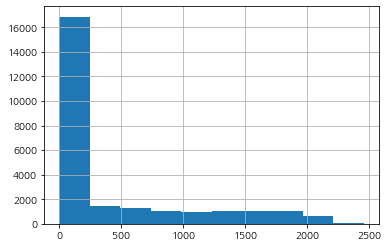

In [366]:
energy_dangjin.dangjin_sum.hist()

In [369]:
real_dj[~real_dj['전운량(10분위)'].isna()].describe()

,기온(°C),풍속(m/s),풍향(16방위),습도(%),전운량(10분위)
count,21656.000000,21656.000000,21620.000000,21656.000000,21656.000000
mean,12.269750,1.859680,161.785384,72.433557,5.261636
std,10.319753,1.546232,136.828422,20.431102,3.805230
min,-19.300000,0.000000,0.000000,10.000000,0.000000
25%,3.800000,0.600000,20.000000,57.000000,1.000000
50%,12.400000,1.500000,160.000000,75.000000,6.000000
75%,21.100000,2.800000,320.000000,91.000000,9.000000
max,36.800000,11.700000,360.000000,99.000000,10.000000


# 예보데이터와 비교

In [210]:
x = np.sum(np.abs(predict_dj['Temperature'] - real_dj['기온(°C)']))/len(real_dj)
print(f'temperature difference : {x}')

temperature difference : 1.3115178776593739


In [211]:
x = np.sum(np.abs(predict_dj['Humidity'] - real_dj['습도(%)']))/len(real_dj)
print(f'humidity differnece : {x}')

humidity differnece : 9.381431831857665


In [215]:
(np.abs(predict_dj['Humidity'] - real_dj['습도(%)'])).max()

64.0

In [216]:
x = np.sum(np.abs(predict_dj['WindSpeed'] - real_dj['풍속(m/s)']))/len(real_dj)
print(f'windspeed differnece : {x}')

windspeed differnece : 1.955486439673289


<AxesSubplot:xlabel='fcst_time', ylabel='Humidity'>

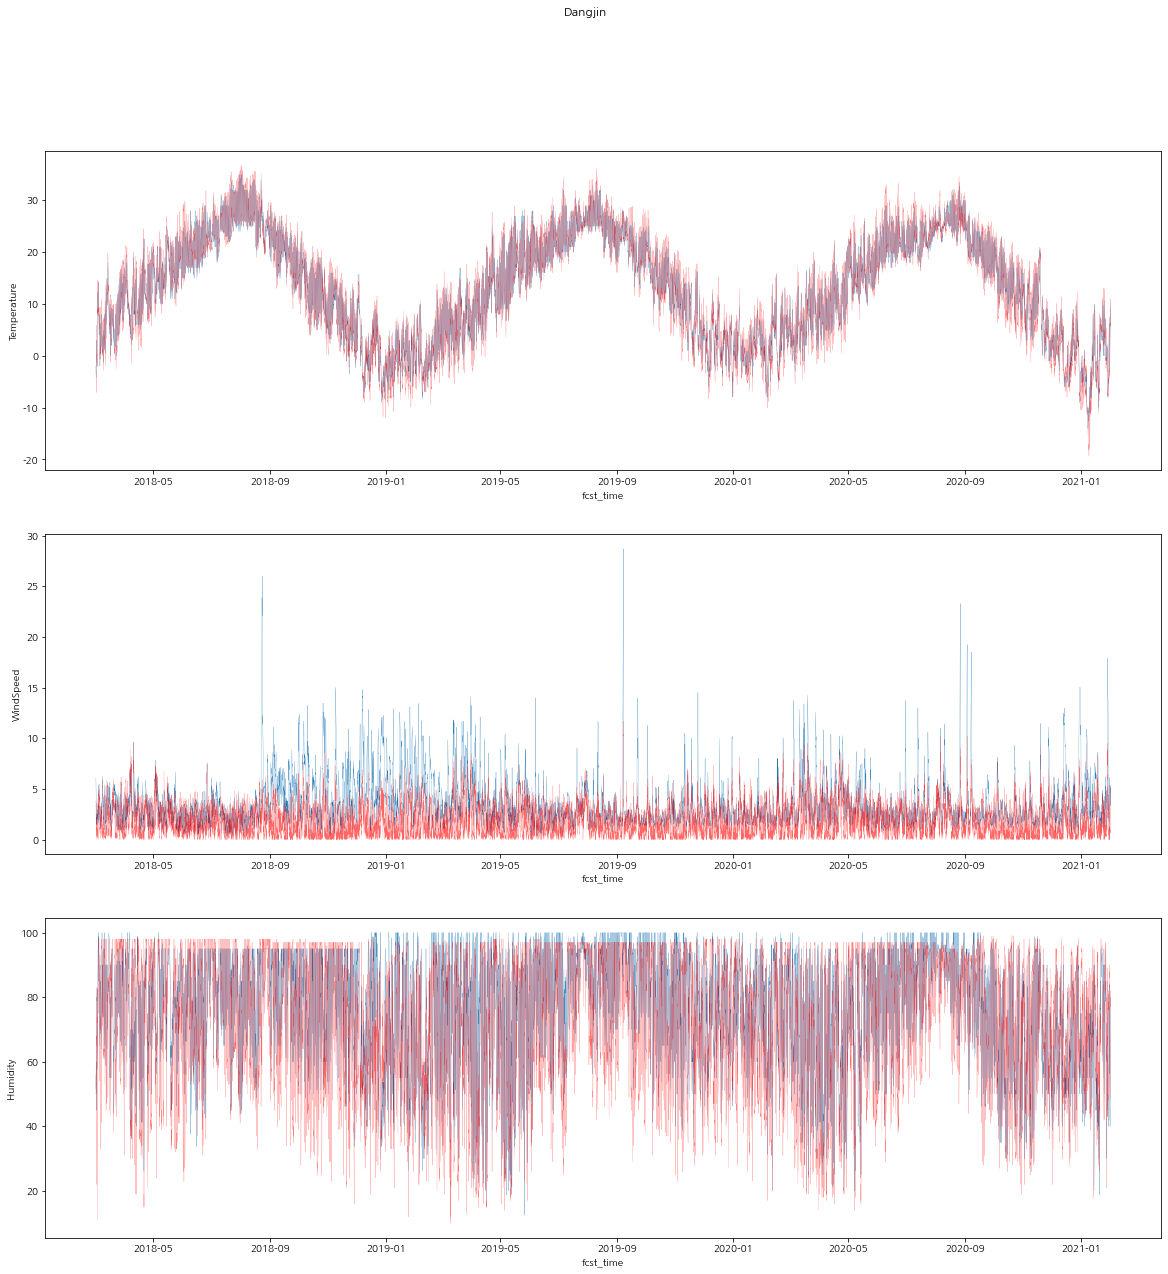

In [217]:
fig = plt.figure(figsize = (20,20))
plt.suptitle('Dangjin')
plt.subplot(311)
sns.lineplot(data = predict_dj, x = 'fcst_time', y = 'Temperature', linewidth = 0.2)
sns.lineplot(data = real_dj, x = '일시', y = '기온(°C)', color = 'red', alpha = 0.6, linewidth = 0.2)

plt.subplot(312)
sns.lineplot(data = predict_dj, x = 'fcst_time', y = 'WindSpeed',linewidth = 0.2)
sns.lineplot(data = real_dj, x = '일시', y = '풍속(m/s)', color = 'red', alpha = 0.6, linewidth = 0.2)

plt.subplot(313)
sns.lineplot(data = predict_dj, x = 'fcst_time', y = 'Humidity', linewidth = 0.2)
sns.lineplot(data = real_dj, x = '일시', y = '습도(%)', color = 'red', alpha = 0.6, linewidth = 0.2)

## 전운량
- 0~2 : 맑음           => 1
- 3~5 : 구름 보통      => 2
- 6~8 : 구름 많음      => 3
- 9~10 : 흐림          => 4

In [2]:
us_obs.isna().sum()

NameError: name 'us_obs' is not defined